# Comparison of Techniques for Optimal Recovery of Viral Particles in the Fecal Microbiome

Loretta De Chiara<sup>1,2</sup>, Ryan Doughty<sup>3</sup>, Nuria Estévez-Gómez<sup>1,2</sup>, Pilar Gallego-García<sup>1,2</sup>, Pilar Alvariño<sup>1,2</sup>, Astrid Díez-Martín<sup>2,4</sup>, Pedro Dávila Piñón<sup>2,4</sup>, Todd J. Treangen<sup>3,5,6</sup>, Joaquín Cubiella<sup>2,4</sup>, David Posada<sup>1,2</sup>

<sup>1</sup>CINBIO, Universidade de Vigo, Vigo, Spain  
<sup>2</sup>Galicia Sur Health Research Institute (IIS Galicia Sur), SERGAS-UVIGO, Vigo, Spain
<sup>3</sup>Department of Computer Science, Rice University, Houston, Texas, USA  
<sup>4</sup>Department of Gastroenterology, Research Group in Gastrointestinal Oncology-Ourense, CIBEREHD, Hospital Universitario de Ourense, Ourense, Spain.
<sup>5</sup>Department of Bioengineering, Rice University, Houston, Texas, USA
<sup>6</sup>Ken Kennedy Institute, Rice University, Houston, Texas, USA


## Analyses and Figures

This markdown contains the code and overview of the analyses performed in order to generate figures for the manuscript (except for figure 1, which was created seperately). There are also some figures that were not included in the final manuscript

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scripts import *
import glob

import warnings
warnings.filterwarnings('ignore')

In [9]:
palette = {'A':"#343a40",
           'A.0.1':"#f94144",
           'A.0.2':"#f3722c",
           'A.1':"#f8961e",
           'A.2':"#90be6d",
           'A.3':"#4d908e",
           'A.4':"#277da1",
           'A.4.1':"#577590"
}

### Figure 2

Figure 2 provides an overview of the distribution of viral reads vs bacterial reads we see in our samples, and analyses of viromeQC data. See methods.

First, we import the overall data generated from our seqscreen results

In [ ]:
overall = pd.read_csv('fast_output.csv', index_col=0)
overall['bacteria_virus_ratio'] = overall['viral_reads'] / overall['bacteria_reads']
overall

,filename,total_reads,total_assigned_reads,assigned_percent,bacteria_reads,reads_percent_bacteria,viral_reads,reads_percent_viral,unique_assignments,unique_species,total_species_assignments,unique_genuses,total_genus_assignments,unique_families,total_family_assignments,bacteria_virus_ratio
0,0168-1Q-virome_S7_L001,1296291,1219353,94.06,1190389,97.62,354,0.03,239,200,292,114,204,52,252,0.000297
1,0168-1Z-virome_S6_L001,1588890,1514721,95.33,1480043,97.71,190,0.01,122,105,168,73,130,40,146,0.000128
2,0168-U-virome_S13_L001,1326604,355924,26.83,132785,37.31,2367,0.67,486,401,2134,210,1683,74,1798,0.017826
3,14-2820AC-VIROME_S5_L001,3215899,1335293,41.52,877524,65.72,20957,1.57,477,400,20226,197,20234,72,19731,0.023882
4,14-2820AC-viromeTruSeq,1333118,707595,53.08,413026,58.37,14235,2.01,1823,1539,12838,588,9964,118,9876,0.034465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,SBD1-virome,227343,135674,59.68,51646,38.07,35782,26.37,62,50,26083,41,25673,27,35736,0.692832
92,SBD2-virome,270128,156197,57.82,60263,38.58,38806,24.84,66,51,28704,37,28244,29,38765,0.643944
93,SBK-virome_S68_L001,351831,220925,62.79,55408,25.08,116249,52.62,73,65,93691,47,93532,33,116213,2.098054
94,SBNK-virome_S71_L001,374529,220508,58.88,45652,20.70,137312,62.27,73,62,115101,41,114954,28,137257,3.007798


We then split this data into each comparison (see scripts)

In [38]:
comp1_data = get_comp1_data(overall)
comp2_data = get_comp2_data(overall)
comp3_data = get_comp3_data(overall)
comp4_data = get_comp4_data(overall)
comp6_data = get_comp6_data(overall)

In [39]:
def boxplot_graph(df, group, group2, data, data_labels, xlabel='',log=False):
    
    n_stats = len(data)
    fig, axes = plt.subplots(1, n_stats, figsize=(2 * n_stats, 2), sharex=True)

    if n_stats == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one statistic

    for ax, stat, label in zip(axes, data, data_labels):
        
        order = sorted([g for g in df[group].unique() if g != 'Control'])
        plot_palette = [palette[group] for group in palette if group in order]
        seaborn_palette = sns.color_palette(plot_palette, len(plot_palette)) 
        df = df.set_index(group).loc[order].reset_index()

        
        sns.boxplot(
            x=group, y=stat, data=df,
            width=0.6,
            ax=ax,
            order=order,
            palette=seaborn_palette
        )

        sns.lineplot(
            x=group, y=stat, data=df,
            color='gray',
            markers=True,
            style=group2,
            dashes=False,
            linewidth=1,
            legend=False,
            ax=ax,
            sort=True            
            )
        
        ax.set_xlabel('')
        ax.set_ylabel(label, fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=7)
        # ax.grid(color='gray', alpha=0.2)

    plt.tight_layout()
    plt.savefig('final_figures/2a-portion.png', dpi=1000, bbox_inches='tight', format='png')
    plt.show()
    

In [40]:
def boxplot_graph_full(datasets, group, group2, data, data_labels, row_labels=None, log=False):
    def format_func(value, tick_number):
        # Format the y-axis values to be consistent
        return f'{value:.1e}' if log else f'{value:.2f}'

    datasets = list(datasets)
    row_labels = list(row_labels)
    
    n_stats = len(data)
    n_datasets = len(datasets)
    fig, axes = plt.subplots(n_datasets, n_stats, figsize=(1.3 * n_stats, 1.25 * n_datasets), constrained_layout=True)

    if n_datasets == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one dataset

    for ax_row, df in zip(axes, datasets):
            
        for ax, stat, label in zip(ax_row, data, data_labels):
            
            order = sorted([g for g in df[group].unique() if g != 'Control'])
            df = df.set_index(group).loc[order].reset_index()

            plot_palette = [palette[group] for group in palette if group in order]
            seaborn_palette = sns.color_palette(plot_palette, len(plot_palette)) 

            sns.boxplot(
                x=group, y=stat, data=df,
                width=0.5,
                ax=ax,
                order=order,
                palette=seaborn_palette
            )

            sns.lineplot(
                x=group, y=stat, data=df,
                color='gray',
                markers=True,
                style=group2,
                dashes=False,
                linewidth=1,
                legend=False,
                ax=ax,
                sort=True      
            )
            
            # ax.set_xticks(range(len(order)))
            ax.set_xticklabels(order)

            ax.set_xlabel('')  # Remove x-axis label
            ax.set_ylabel('')  # Remove x-axis label
            ax.tick_params(axis='both', which='major', labelsize=7)
            ax.set_ylim(0, 100)
            # ax.grid(color='gray', alpha=0.2)
            sns.despine(ax=ax)

            # Apply the y-axis formatter
            # ax.yaxis.set_major_formatter(FuncFormatter(format_func))

    # Add shared y-axis labels at the top
    for ax, label in zip(axes[0], data_labels):
        ax.annotate(label, xy=(0.5, 1.05), xytext=(0, 5),
                    xycoords='axes fraction', textcoords='offset points',
                    ha='center', va='baseline', fontsize=9)
        
    if row_labels:
        for ax, label in zip(axes, row_labels):
            ax[0].annotate(label, xy=(-0.1, 0.5), xytext=(-ax[0].yaxis.labelpad - 5, 0),
                           xycoords=ax[0].yaxis.label, textcoords='offset points',
                           ha='center', va='center', fontsize=9, rotation=90)

    plt.savefig('final_figures/2a.png', dpi=1000, bbox_inches='tight', format='png')
    plt.show()

##### Figure 2a
This figure shows some of the major important statistics for our samples, including the percentage of reads assigned overall and what percent of those were viral vs bacterial. We show some differences between each method and all samples individually. We also have a subplot for viral enrichment / percent viral given the values are so low

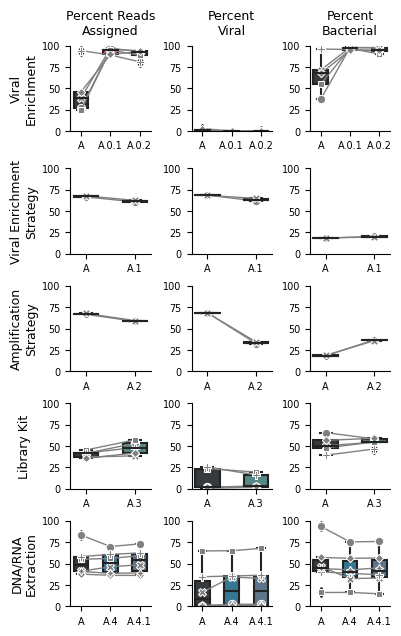

In [41]:
boxplot_graph_full([comp1_data, comp2_data, comp3_data, comp4_data, comp6_data], 'Group', 'Individual', ['assigned_percent','reads_percent_viral', 'reads_percent_bacteria'], ['Percent Reads\nAssigned','Percent\nViral', 'Percent\nBacterial'], ['Viral\nEnrichment', 'Viral Enrichment\nStrategy', 'Amplification\nStrategy', 'Library Kit', 'DNA/RNA\nExtraction'])

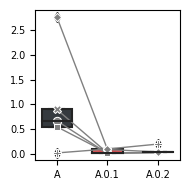

In [42]:
boxplot_graph(comp1_data, 'Group', 'Individual', ['reads_percent_viral'], [''], xlabel='Extraction Method')

##### Figure 2b and 2c
This figure shows the overall log2fold gain of each method over the other. The script to generate these also outputs the p-values between each row and the control protocol

In [43]:
comp1_data = get_comp1_data(overall, True)
comp2_data = get_comp2_data(overall, True)
comp3_data = get_comp3_data(overall, True)
comp4_data = get_comp4_data(overall, True)
comp6_data = get_comp6_data(overall, True)

In [44]:
from scipy.stats import mannwhitneyu

def multiple_fold_changes(dataframes, control_groups, group_labels, stats, stats_labels, fold_change_sig=1, p_val=0.05, plot_controls=True, save_name='2b'):
    terms = []
    coefs = []
    lowers = []
    uppers = []
    groups = []
    significances = []
    control = []

    # Iterate over each dataframe and its control group
    for df, control_group, group_label in zip(dataframes, control_groups, group_labels):
        test_groups = df['Group'].unique()
        if not plot_controls:
            test_groups = test_groups[test_groups != control_group]

        test_groups = reversed(sorted(list(test_groups)))

        for group in test_groups:
            for stat in stats:
                individual_fold_changes = calculate_individual_fold_changes(df, control_group, group, stat)
                fold_change_mean = np.mean(individual_fold_changes)
                fold_change_std = np.std(individual_fold_changes)

                control_values = df[df['Group'] == control_group][stat].dropna()
                test_values = df[df['Group'] == group][stat].dropna()
                t_stat, p_value = mannwhitneyu(control_values, test_values)

                terms.append(f"{stat} ({group})")
                coefs.append(fold_change_mean)
                control.append(control_group)

                std_error = fold_change_std / np.sqrt(len(individual_fold_changes))
                lowers.append(fold_change_mean - 1.96 * std_error)  # 95% CI lower bound
                uppers.append(fold_change_mean + 1.96 * std_error)
                groups.append(group_label)
                print(group, stat, p_value)
                significances.append((abs(fold_change_mean) >= fold_change_sig) and (p_value <= p_val))

    num_stats = len(stats)
    fig, axs = plt.subplots(1, num_stats, figsize=(8, 3), sharey=True)

    if num_stats == 1:
        axs = [axs]

    for stat_idx, (stat, stats_label) in enumerate(zip(stats, stats_labels)):
        ax = axs[stat_idx]
        stat_indices = [i for i, term in enumerate(terms) if term.startswith(stat)]
        
        ax.axvline(x=0, linestyle='dotted', color='black', linewidth=1.7)  # Reference line at 0
        ax.plot(0, 0, marker='o', mfc=palette['A'], mec=palette['A'])
        y_vals = [0]

        for i in stat_indices:
            y_val = (int(i / len(stats)) * len(stats)) + len(stats)
            y_vals.append(y_val)
            if ' '.join(terms[i].split()[1:])[1:-1] == control[i]:  # Check if it's the control group
                line_color = 'gray'  # Control group color
                marker_color = 'gray'  # Marker for the control group
            else:
                line_color = 'black'  # Test group color
                marker_color = 'crimson' if significances[i] else 'navy'  # Marker for significant/non-significant points

            ax.plot([lowers[i], uppers[i]], [y_val, y_val], color=line_color)  # Interval
            ax.plot(coefs[i], y_val, marker='o', mfc=marker_color, mec=marker_color)
        
        stat_indices = [0] + [stat for stat in stat_indices]
        ax.set_yticks(y_vals)
        ax.set_ylim(-2, max(y_vals)+2)
        stat_labels = ['A (Baseline)'] + [f"{' '.join(term.split()[1:])[1:-1]}" for term in terms if term.startswith(stat)]
        ax.set_yticklabels(stat_labels, fontsize=8)
        ax.tick_params(axis='x', which='major', labelsize=6)
        ax.set_xlabel('Log2 Fold Change', fontsize=8)
        ax.set_title(f'{stats_label}', fontsize=10)
        ax.grid(alpha=0.5)      

    plt.tight_layout()
    plt.savefig(f"final_figures/{save_name}.png", dpi=1000, bbox_inches='tight', format='png')
    plt.show()
    
    # return pd.DataFrame({'terms': terms, 'log2fold': coefs, 'low95': lowers, 'up95': uppers, 'group': groups})

['A.4 DNA/RNA Extraction', 'A.3 Library Kit', 'A.2 Amplification Strategy', 'A.1 Enrichment Strategy', 'A.0 Viral Enrichment']
A.4.1 (Purelink + cDNA synthesis) assigned_percent 0.9372294372294373
A.4.1 (Purelink + cDNA synthesis) reads_percent_viral 0.48484848484848486
A.4.1 (Purelink + cDNA synthesis) reads_percent_bacteria 0.5887445887445888
A.4 (PureLink Viral RNA/DNA mini kit) assigned_percent 1.0
A.4 (PureLink Viral RNA/DNA mini kit) reads_percent_viral 0.5887445887445888
A.4 (PureLink Viral RNA/DNA mini kit) reads_percent_bacteria 0.5887445887445888
A.3 (TruSeq Nano DNA Library Prep) assigned_percent 0.09523809523809523
A.3 (TruSeq Nano DNA Library Prep) reads_percent_viral 0.6904761904761905
A.3 (TruSeq Nano DNA Library Prep) reads_percent_bacteria 0.6904761904761905
A.2 (MDA Amplification) assigned_percent 0.3333333333333333
A.2 (MDA Amplification) reads_percent_viral 0.3333333333333333
A.2 (MDA Amplification) reads_percent_bacteria 0.3333333333333333
A.1 (PEG-6000) assigned_p

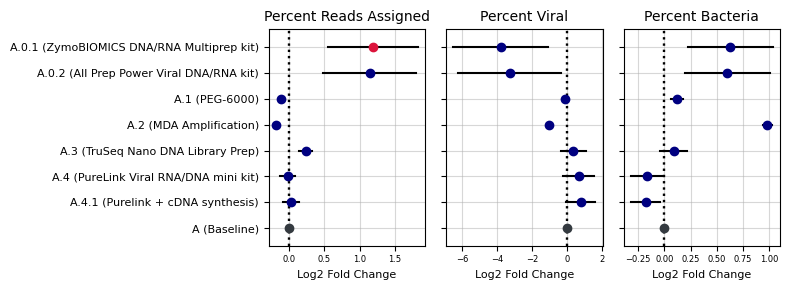

In [45]:
dataframes = [comp1_data, comp2_data, comp3_data, comp4_data, comp6_data]  # Add as many dataframes as you have
dataframes = list(reversed([comp1_data, comp2_data, comp3_data, comp4_data, comp6_data]))  # Add as many dataframes as you have
control_groups = ['A (Baseline)']*5  # Corresponding control groups for each dataframe
# group_labels = ['A.0 Viral Enrichment', 'A.1 Enrichment Strategy', 'A.2 Amplification Strategy', 'A.3 Library Kit', 'A.4 DNA/RNA Extraction']
group_labels = list(reversed(['A.0 Viral Enrichment', 'A.1 Enrichment Strategy', 'A.2 Amplification Strategy', 'A.3 Library Kit', 'A.4 DNA/RNA Extraction']))
print(group_labels)
out = multiple_fold_changes(dataframes, control_groups, group_labels, ['assigned_percent','reads_percent_viral', 'reads_percent_bacteria'], ['Percent Reads Assigned', 'Percent Viral', 'Percent Bacteria'], p_val=0.05, plot_controls=False)

A.4.1 (Purelink + cDNA synthesis) assigned_percent 0.9372294372294373
A.4.1 (Purelink + cDNA synthesis) viral_reads 0.48484848484848486
A.4.1 (Purelink + cDNA synthesis) bacteria_reads 0.9372294372294373
A.4 (PureLink Viral RNA/DNA mini kit) assigned_percent 1.0
A.4 (PureLink Viral RNA/DNA mini kit) viral_reads 0.6991341991341992
A.4 (PureLink Viral RNA/DNA mini kit) bacteria_reads 0.9372294372294373
A.3 (TruSeq Nano DNA Library Prep) assigned_percent 0.09523809523809523
A.3 (TruSeq Nano DNA Library Prep) viral_reads 0.6904761904761905
A.3 (TruSeq Nano DNA Library Prep) bacteria_reads 0.007936507936507936
A.2 (MDA Amplification) assigned_percent 0.3333333333333333
A.2 (MDA Amplification) viral_reads 0.3333333333333333
A.2 (MDA Amplification) bacteria_reads 0.3333333333333333
A.1 (PEG-6000) assigned_percent 0.3333333333333333
A.1 (PEG-6000) viral_reads 0.3333333333333333
A.1 (PEG-6000) bacteria_reads 0.3333333333333333
A.0.2 (All Prep Power Viral DNA/RNA kit) assigned_percent 0.15079365

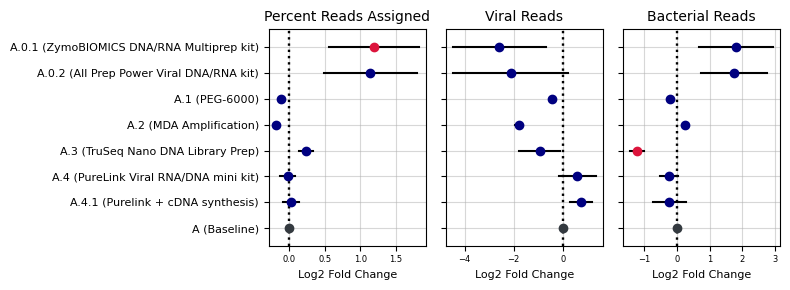

In [46]:
out = multiple_fold_changes(dataframes, control_groups, group_labels, ['assigned_percent','viral_reads', 'bacteria_reads'], ['Percent Reads Assigned', 'Viral Reads', 'Bacterial Reads'], p_val=0.05, plot_controls=False)

For 2C, we are looking at the viromeQC stats, which I have to pull from this csv file:

In [47]:
viromeqc = pd.read_csv('statistics.csv', index_col=0)
viromeqc = viromeqc.rename(columns={'viromeQC score':'viromeQC_score','SSU rRNA alignment rate':'SSU_rate','LSU rRNA alignment rate':'LSU_rate', 'Bacterial markers alignment rate':'bac_rate'})
viromeqc = viromeqc[viromeqc['SSU_rate'].notna()]
# viromeqc['Virus:bacteria ratio'] = viromeqc['Virus:bacteria ratio'].astype(float)
comp1_data = get_comp1_data(viromeqc, True)
comp2_data = get_comp2_data(viromeqc, True)
comp3_data = get_comp3_data(viromeqc, True)
comp4_data = get_comp4_data(viromeqc, True)
comp6_data = get_comp6_data(viromeqc, True)

comp1_data['Virus:bacteria ratio'] = comp1_data['Virus:bacteria ratio'].astype(float)
comp2_data['Virus:bacteria ratio'] = comp2_data['Virus:bacteria ratio'].astype(float)
comp3_data['Virus:bacteria ratio'] = comp3_data['Virus:bacteria ratio'].astype(float)
comp4_data['Virus:bacteria ratio'] = comp4_data['Virus:bacteria ratio'].astype(float)
comp6_data['Virus:bacteria ratio'] = comp6_data['Virus:bacteria ratio'].astype(float)


A.4.1 (Purelink + cDNA synthesis) Virus:bacteria ratio 0.3939393939393939
A.4.1 (Purelink + cDNA synthesis) viromeQC_score 0.24025974025974026
A.4.1 (Purelink + cDNA synthesis) SSU_rate 0.17965367965367965
A.4 (PureLink Viral RNA/DNA mini kit) Virus:bacteria ratio 0.5887445887445888
A.4 (PureLink Viral RNA/DNA mini kit) viromeQC_score 1.0
A.4 (PureLink Viral RNA/DNA mini kit) SSU_rate 0.8181818181818182
A.3 (TruSeq Nano DNA Library Prep) Virus:bacteria ratio 0.6904761904761905
A.3 (TruSeq Nano DNA Library Prep) viromeQC_score 0.007936507936507936
A.3 (TruSeq Nano DNA Library Prep) SSU_rate 0.007936507936507936
A.2 (MDA Amplification) Virus:bacteria ratio 0.3333333333333333
A.2 (MDA Amplification) viromeQC_score 0.3333333333333333
A.2 (MDA Amplification) SSU_rate 0.3333333333333333
A.1 (PEG-6000) Virus:bacteria ratio 0.3333333333333333
A.1 (PEG-6000) viromeQC_score 0.6666666666666666
A.1 (PEG-6000) SSU_rate 1.0
A.0.2 (All Prep Power Viral DNA/RNA kit) Virus:bacteria ratio 0.150793650793

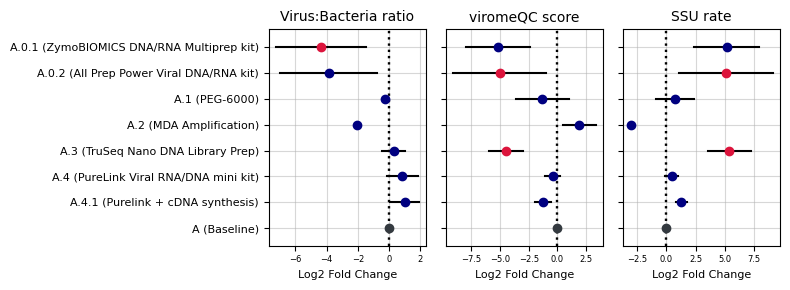

In [48]:
dataframes = list(reversed([comp1_data, comp2_data, comp3_data, comp4_data, comp6_data]))  # Add as many dataframes as you have
control_groups = ['A (Baseline)']*5  # Corresponding control groups for each dataframe
multiple_fold_changes(dataframes, control_groups, group_labels, ['Virus:bacteria ratio','viromeQC_score', 'SSU_rate'], ['Virus:Bacteria ratio', 'viromeQC score', 'SSU rate'], p_val=.05, plot_controls=False, save_name='2c')

Note: the SSU rate was not included in final figure, but was used to make sure the subplot sizes aligned.

## Figure 3
Figure 3 shows the assembly overviews. We assembled every sample using megahit and ran the resulting contigs through checkv, then analyzed the outputs.

Note: these files are not available currently through Github

In [49]:
files = glob.glob('../../../Methods_Comparison_Data/assembled/assembly/*/checkv/quality_summary.tsv')

The following generates some general statistics from the CheckV outputs

In [50]:
def get_general_stats(files):
    
    stats = pd.DataFrame(columns=['Contigs', 'Contigs1000', 'Contigs2000', 'Contigs5000', 'Contigs10000', 'Contigs20000', 'Assembly_Length', 'Mean Contig Length', 'Median Contig Length', 'Max Contig Length', 'Quality Not Determined', 'Low Quality', 'Medium Quality', 'High Quality', 'Complete', 'SumHighQuality'])
    
    for file in files:
        df = pd.read_csv(file, delimiter='\t')

        num_contigs = len(df)
        len1000 = len(df[df['contig_length'] >= 1000])
        len2000 = len(df[df['contig_length'] >= 2000])
        len5000 = len(df[df['contig_length'] >= 5000])
        len10000 = len(df[df['contig_length'] >= 10000])
        len20000 = len(df[df['contig_length'] >= 20000])
        mean_length = df['contig_length'].mean()
        med_length = df['contig_length'].median()
        max_length = df['contig_length'].max()
        
        df = df[df['contig_length']>=1000]
        not_determined = len(df[df['checkv_quality'] == 'Not-determined'])
        low_q = len(df[df['checkv_quality'] == 'Low-quality'])
        mid_q = len(df[df['checkv_quality'] == 'Medium-quality'])
        high_q = len(df[df['checkv_quality'] == 'High-quality'])
        comp = len(df[df['checkv_quality'] == 'Complete'])
        sum_high_qual = mid_q + high_q + comp
        assem_length = sum(df['contig_length'])
        
        file_name = file.split('/')[-3]
        new_row = {'Contigs':num_contigs, 
                   'Contigs1000':len1000,
                   'Contigs2000':len2000,
                   'Contigs5000':len5000,
                   'Contigs10000':len10000,
                   'Contigs20000':len20000,
                   'Assembly_Length': assem_length,
                   'Mean Contig Length': mean_length, 
                   'Median Contig Length': med_length,
                   'Max Contig Length': max_length,
                   'Quality Not Determined': not_determined,
                   'Low Quality': low_q,
                   'Medium Quality': mid_q,
                   'High Quality': high_q,
                   'Complete': comp,
                   'SumHighQuality': sum_high_qual}
        
        stats.loc[file_name] = new_row
        
    return stats

In [51]:
stats = get_general_stats(files)
stats['filename'] = stats.index
stats.sort_index()

,Contigs,Contigs1000,Contigs2000,Contigs5000,Contigs10000,Contigs20000,Assembly_Length,Mean Contig Length,Median Contig Length,Max Contig Length,Quality Not Determined,Low Quality,Medium Quality,High Quality,Complete,SumHighQuality,filename
0168-1Q-virome_S7_L001,5277,216,25,2,0,0,314907,550.449498,477.0,5526,187,29,0,0,0,0,0168-1Q-virome_S7_L001
0168-1Z-virome_S6_L001,819,30,7,1,0,0,52168,505.183150,436.0,5023,28,2,0,0,0,0,0168-1Z-virome_S6_L001
0168-U-virome_S13_L001,107,14,3,2,0,0,29587,690.607477,451.0,6192,1,10,1,1,1,3,0168-U-virome_S13_L001
14-2820AC-VIROME_S5_L001,140,19,9,5,0,0,53780,830.464286,495.0,6541,1,11,2,1,4,7,14-2820AC-VIROME_S5_L001
14-2820AC-viromeTruSeq,832,59,13,4,0,0,110626,574.979567,446.0,6210,13,37,5,3,1,9,14-2820AC-viromeTruSeq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBD1-virome,56,20,18,11,0,0,88145,1917.678571,645.5,6732,1,7,0,2,10,12,SBD1-virome
SBD2-virome,65,23,16,11,0,0,90089,1736.892308,667.0,6733,3,8,0,2,10,12,SBD2-virome
SBK-virome_S68_L001,20,7,5,3,0,0,25205,1632.300000,722.0,6145,1,4,0,0,2,2,SBK-virome_S68_L001
SBNK-virome_S71_L001,14,5,5,4,0,0,24180,1933.714286,371.0,5752,1,1,0,3,0,3,SBNK-virome_S71_L001


In [52]:
comp1 = get_comp1_data(stats)
comp2 = get_comp2_data(stats)
comp3 = get_comp3_data(stats)
comp4 = get_comp4_data(stats)
comp5 = get_comp6_data(stats)
comp4 = comp4[comp4['filename'] != 'S2-5882-viromeTruSeq'] ## ommitted due to low QC

In [53]:

import matplotlib.ticker as ticker

def plot_box_allq(data, order=None, title='Contigs by Quality', save_name=''):
    
    palette = sns.color_palette("Paired")  # You can choose any seaborn palette, e.g., "Blues", "viridis", etc.
    custom_palette = ['gray'] + palette[1:]
    
    
    df_long = data[['Group', 'Quality Not Determined', 'Low Quality', 'Medium Quality', 'High Quality', 'Complete']].melt(id_vars='Group', var_name='quality', value_name='value')

    # Creating subplots
    fig, axes = plt.subplots(1, 2, figsize=(5, 3), gridspec_kw={'width_ratios': [2, 3]})
    
    # Define the order of the quality categories
    quality_order_all = ['Quality Not Determined', 'Low Quality']
    quality_order_rest = ['Medium Quality', 'High Quality', 'Complete']

    # First subplot: only Low Quality
    if order:
        sns.boxplot(ax=axes[0], x='quality', y='value', hue='Group', data=df_long[df_long['quality'].isin(quality_order_all)],
                order=quality_order_all, hue_order=order, palette=custom_palette)
    else:
        sns.boxplot(ax=axes[0], x='quality', y='value', hue='Group', data=df_long[df_long['quality'].isin(quality_order_all)],
                order=quality_order_all, palette=custom_palette)
    axes[0].set_xticks([0, 1], ['Und', 'Low'])
    axes[0].set_ylabel('Number of Contigs', size=9)
    axes[0].set_ylim(bottom=0)
    axes[0].set_xlabel('')
    axes[0].legend().remove()
    # axes[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure whole number yticks



    # Second subplot: Medium Quality, High Quality, Complete
    if order:
        sns.boxplot(ax=axes[1], x='quality', y='value', hue='Group', data=df_long[df_long['quality'].isin(quality_order_rest)],
                    order=quality_order_rest, hue_order=order, palette=custom_palette)
    else:
        sns.boxplot(ax=axes[1], x='quality', y='value', hue='Group', data=df_long[df_long['quality'].isin(quality_order_rest)],
                    order=quality_order_rest, palette=custom_palette)
    axes[1].set_xticks([0, 1, 2], ['Med', 'High', 'Comp'])
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend(title='Protocol', bbox_to_anchor=(1.8, 0.5), loc='right')
    axes[1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure whole number yticks
    axes[1].set_ylim(0, df_long[df_long['quality'].isin(quality_order_rest)]['value'].max() * 1.05)

    
    fig.supxlabel('CheckV Quality/Completeness', size=9, y=0.07, x=0.4)
    fig.suptitle(title, y=0.93, x=0.4)
    plt.tight_layout()
    plt.savefig(f'final_figures/3a_{save_name}.png', dpi=600, bbox_inches='tight')
    plt.show()

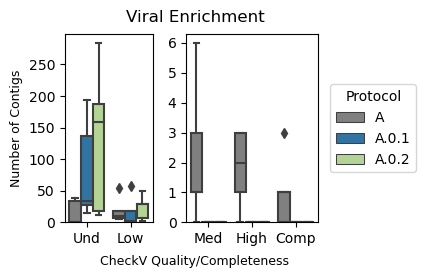

In [54]:
plot_box_allq(comp1, order = ['A', 'A.0.1', 'A.0.2'], title='Viral Enrichment', save_name='0') 

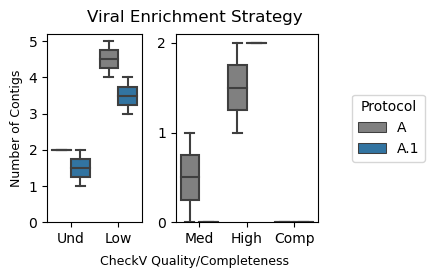

In [55]:
plot_box_allq(comp2, order=['A', 'A.1'], title='Viral Enrichment Strategy', save_name='1')

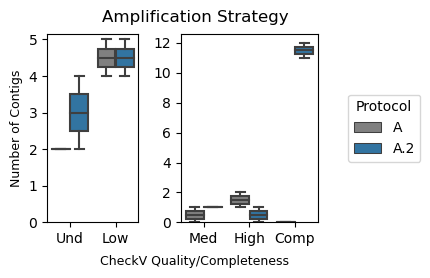

In [56]:
plot_box_allq(comp3, order=['A', 'A.2'], title='Amplification Strategy', save_name='2')

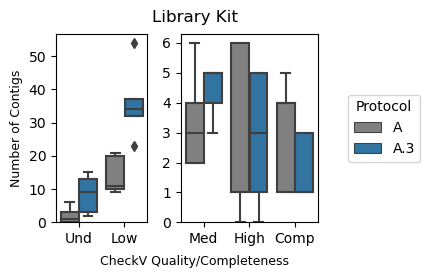

In [57]:
plot_box_allq(comp4, order=['A', 'A.3'], title='Library Kit', save_name='3')

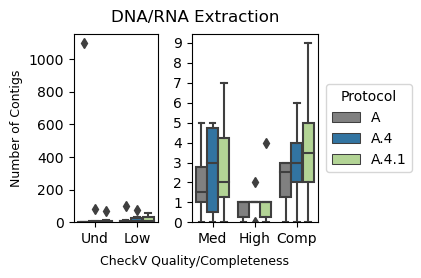

In [58]:
plot_box_allq(comp5, order=['A', 'A.4', 'A.4.1'], title='DNA/RNA Extraction', save_name='4')

In [59]:
comp1 = get_comp1_data(stats, True)
comp2 = get_comp2_data(stats, True)
comp3 = get_comp3_data(stats, True)
comp4 = get_comp4_data(stats, True)
comp5 = get_comp6_data(stats, True).sort_values(by='Group', ascending=True) 
comp4 = comp4[comp4['filename'] != 'S2-5882-viromeTruSeq']

A.4.1 (Purelink + cDNA synthesis) Contigs1000 0.748348568843747
A.4.1 (Purelink + cDNA synthesis) Assembly_Length 0.48484848484848486
A.4.1 (Purelink + cDNA synthesis) SumHighQuality 0.33412028935789195
A.4 (PureLink Viral RNA/DNA mini kit) Contigs1000 0.9372294372294373
A.4 (PureLink Viral RNA/DNA mini kit) Assembly_Length 0.6991341991341992
A.4 (PureLink Viral RNA/DNA mini kit) SumHighQuality 0.33240600419598887
A.3 (TruSeq Nano DNA Library Prep) Contigs1000 0.015873015873015872
A.3 (TruSeq Nano DNA Library Prep) Assembly_Length 0.30952380952380953
A.3 (TruSeq Nano DNA Library Prep) SumHighQuality 1.0
A.2 (MDA Amplification) Contigs1000 0.3333333333333333
A.2 (MDA Amplification) Assembly_Length 0.3333333333333333
A.2 (MDA Amplification) SumHighQuality 0.1939308522824107
A.1 (PEG-6000) Contigs1000 0.22067136191984682
A.1 (PEG-6000) Assembly_Length 0.6666666666666666
A.1 (PEG-6000) SumHighQuality 1.0
A.0.2 (All Prep Power Viral DNA/RNA kit) Contigs1000 0.2222222222222222
A.0.2 (All Pre

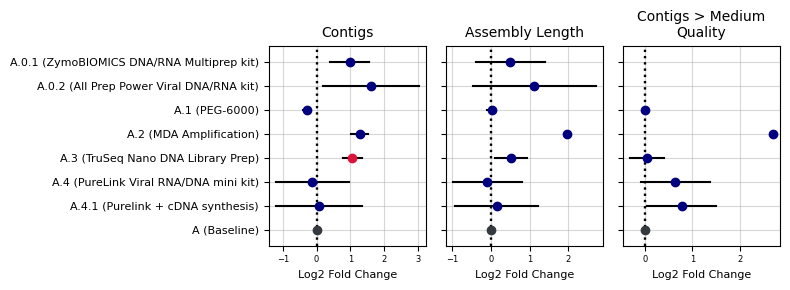

In [60]:
combined = pd.concat([comp1, comp2, comp3, comp4, comp5], ignore_index=True).sort_values(by='Group', ascending=False)
combined[['Assembly_Length', 'filename', 'Group', 'Individual']]

multiple_fold_changes(list(reversed([comp1, comp2, comp3, comp4, comp5])), ["A (Baseline)"]*5, ['']*5, ['Contigs1000', 'Assembly_Length', 'SumHighQuality'], ['Contigs', 'Assembly Length', 'Contigs > Medium\nQuality'], p_val=0.05, fold_change_sig=1, plot_controls=False, save_name="3b")

## Figure 4

Figure 4 shows the differences in diversity that we saw across the samples, in particular for 3 of the protocols that were thoroughly tested.

In [ ]:
family_data = pd.read_csv('family_data.csv', index_col=0).T
family_data['filename'] = family_data.index.str[:-4]

species_data = pd.read_csv('species_data.csv', index_col=0).T
species_data['filename'] = species_data.index.str[:-4]

sp1_data = get_comp1_data(species_data)
sp2_data = get_comp2_data(species_data)
sp3_data = get_comp3_data(species_data)
sp4_data = get_comp4_data(species_data)
sp6_data = get_comp6_data(species_data)

fam1_data = get_comp1_data(family_data)
fam2_data = get_comp2_data(family_data)
fam3_data = get_comp3_data(family_data)
fam4_data = get_comp4_data(family_data)
fam6_data = get_comp6_data(family_data)

In [62]:
from scipy.stats import t, chi2

def chi_squared_pval(diversity, groups, n=6):
    if len(groups) != 2:
        return 0
    group1 = diversity[diversity['Group']==groups[0]]
    group2 = diversity[diversity['Group']==groups[1]]
    
    chi_sum = []
    
    thresholds = diversity['threshold'].unique()
    degrees_freedom = 2*n-2
    
    for thresh in thresholds:

        gr1_mean = float(group1[(group1['threshold']==thresh)]['mean'])
        gr2_mean = float(group2[(group2['threshold']==thresh)]['mean'])
        gr1_sem = float(group1[(group1['threshold']==thresh)]['sem'])
        gr2_sem = float(group2[(group2['threshold']==thresh)]['sem'])
                
        se_diff = np.sqrt(gr1_sem**2 + gr2_sem**2)
        t_val = np.abs(gr1_mean-gr2_mean) / se_diff
        prob  = 2*t.sf(abs(t_val), degrees_freedom)
        chi_squared = chi2.ppf(1-prob, 1)
        chi_sum.append(chi_squared)
        
    return 1-chi2.cdf(sum(chi_sum), len(thresholds))

In [63]:
def plot_viral_families_species_full(dfs_families, dfs_species, thresholds, group_names, overall_title):
    num_plots = len(dfs_families)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(4*num_plots, 4))
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one subplot
        

    
    for i, (df_families, df_species, group_name) in enumerate(zip(dfs_families, dfs_species, group_names)):
        groups = sorted([g for g in df_families['Group'].unique() if g != 'Control'])
        results_families = []
        results_species = []        
        

        for threshold in thresholds:
            df_families['num_viral_families'] = calculate_viral_families(df_families, threshold)
            summary_families = df_families.groupby('Group')['num_viral_families'].agg(['mean', sem]).reset_index()
            summary_families['threshold'] = threshold
            results_families.append(summary_families)
            
            df_species['num_viral_species'] = calculate_viral_families(df_species, threshold)
            summary_species = df_species.groupby('Group')['num_viral_species'].agg(['mean', sem]).reset_index()
            summary_species['threshold'] = threshold
            results_species.append(summary_species)
        
        results_families = pd.concat(results_families)
        results_species = pd.concat(results_species)
        
        
        seaborn_palette = sns.color_palette('colorblind', n_colors=len(groups))

        ax = axes[i]
        
                #calculate pvalues for groups in comparison to baseline and get the labels (not included in final)
        p_vals = {} #labels
        for group in groups:
            p_vals[group] = {}
            family_p = chi_squared_pval(results_families, ['A', group], n=5)
            print(group, family_p)
            if family_p < 0.001:
                p_vals[group]['family'] = '***'
            elif family_p < 0.01:
                p_vals[group]['family'] = '**'
            elif family_p < 0.05:
                p_vals[group]['family'] = '*'
            else:
                p_vals[group]['family'] = ''

            species_p = chi_squared_pval(results_species, ['A', group], n=5)
            if species_p < 0.001:
                p_vals[group]['species'] = '***'
            elif family_p < 0.01:
                p_vals[group]['species'] = '**'
            elif species_p < 0.05:
                p_vals[group]['species'] = '*'
            else:
                p_vals[group]['species'] = ''
              
            p_vals[group]['label'] = p_vals[group]['family']

        # Plot for viral families
        for group, color in zip(groups, seaborn_palette):

            group_data_families = results_families[results_families['Group'] == group]
            ax.plot(group_data_families['threshold'], group_data_families['mean'], label=group, linestyle='-', color=color)
            ax.fill_between(group_data_families['threshold'], 
                             group_data_families['mean'] - group_data_families['sem'], 
                             group_data_families['mean'] + group_data_families['sem'], 
                             alpha=0.2, color=color)

        # Plot for viral species
        for group, color in zip(groups, seaborn_palette):
        
            group_data_species = results_species[results_species['Group'] == group]
            ax.plot(group_data_species['threshold'], group_data_species['mean'], linestyle='--', color=color)
            ax.fill_between(group_data_species['threshold'], 
                             group_data_species['mean'] - group_data_species['sem'], 
                             group_data_species['mean'] + group_data_species['sem'], 
                             alpha=0.1, color=color)
        
        if i == 0:
            ax.set_ylabel('Number of Viral Families / Species')
        ax.set_xlabel('Read Threshold')
        ax.set_yscale('log')
        ax.set_title(group_name)
        ax.legend(title='Protocol')
        # ax.grid(True, which='both', alpha=0.3, linewidth=0.5)
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.ticklabel_format(style='plain', axis='y')
        ax.set_ylim(bottom=0.0, top=1000)
        ax.set_xlim(0, thresholds[-1])

    
    plt.suptitle(overall_title, fontsize=10, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('final_figures/4a.png', dpi=600, bbox_inches='tight', format='png')
    plt.show()

In [64]:
def plot_richness_families_species_full(dfs_families, dfs_species, thresholds, group_names, overall_title, method='Shannon'):
    num_plots = len(dfs_families)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(4*num_plots, 4))
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one subplot
    
    for i, (df_families, df_species, group_name) in enumerate(zip(dfs_families, dfs_species, group_names)):
        groups = sorted(['A'] + [g for g in df_families['Group'].unique() if g != 'A'])
        results_families = []
        results_species = []

        for threshold in thresholds:
            if method == 'Shannon':
                df_families['num_viral_families'] = calculate_viral_richness(df_families, threshold)
            elif method == 'Simpson':
                df_families['num_viral_families'] = calculate_viral_richness_simpson(df_families, threshold)

            summary_families = df_families.groupby('Group')['num_viral_families'].agg(['mean', sem]).reset_index()
            summary_families['threshold'] = threshold
            results_families.append(summary_families)
            
            if method == 'Shannon':
                df_species['num_viral_species'] = calculate_viral_richness(df_species, threshold)
            elif method == 'Simpson':
                df_species['num_viral_species'] = calculate_viral_richness_simpson(df_species, threshold)
            summary_species = df_species.groupby('Group')['num_viral_species'].agg(['mean', sem]).reset_index()
            summary_species['threshold'] = threshold
            results_species.append(summary_species)
        
        results_families = pd.concat(results_families)
        results_species = pd.concat(results_species)
        
        sns.set_palette('colorblind')
        colors = sns.color_palette('colorblind', n_colors=len(groups))
    

        ax = axes[i]
        
        #calculate pvalues for groups in comparison to baseline and get the labels (not included in final)
        p_vals = {} #labels
        for group in groups:
            p_vals[group] = {}
            family_p = chi_squared_pval(results_families, ['A', group], n=5)
            print(group, family_p)
            if family_p < 0.001:
                p_vals[group]['family'] = '***'
            elif family_p < 0.01:
                p_vals[group]['family'] = '**'
            elif family_p < 0.05:
                p_vals[group]['family'] = '*'
            else:
                p_vals[group]['family'] = ''

            species_p = chi_squared_pval(results_species, ['A', group], n=5)
            if species_p < 0.001:
                p_vals[group]['species'] = '***'
            elif family_p < 0.01:
                p_vals[group]['species'] = '**'
            elif species_p < 0.05:
                p_vals[group]['species'] = '*'
            else:
                p_vals[group]['species'] = ''
              
            p_vals[group]['label'] = p_vals[group]['family']


        # Plot for viral families
        for group, color in zip(groups, colors):
            group_data_families = results_families[results_families['Group'] == group]
            # out_label = f'{group}{p_vals[group]["label"]}'
            out_label = f'{group}'
            ax.plot(group_data_families['threshold'], group_data_families['mean'], label=out_label, linestyle='-', color=color)
            ax.fill_between(group_data_families['threshold'], 
                             group_data_families['mean'] - group_data_families['sem'], 
                             group_data_families['mean'] + group_data_families['sem'], 
                             alpha=0.3, color=color)

        # Plot for viral species
        for group, color in zip(groups, colors):
            group_data_species = results_species[results_species['Group'] == group]
            ax.plot(group_data_species['threshold'], group_data_species['mean'], linestyle='--', color=color)
            ax.fill_between(group_data_species['threshold'], 
                             group_data_species['mean'] - group_data_species['sem'], 
                             group_data_species['mean'] + group_data_species['sem'], 
                             alpha=0.1, color=color)
        
        if i == 0:
            ax.set_ylabel(f'{method} Index')
        ax.set_xlabel('Read Threshold')
        # ax.set_yscale('log')
        ax.set_title(group_name)
        ax.legend(title='Protocol')
        # ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.ticklabel_format(style='plain', axis='y')
        if method == 'Simpson':
            ax.set_ylim(0, 1)
        ax.set_xlim(0, thresholds[-1])
        # ax.set_ylim(bottom=0.0, top=1000)
    
    plt.suptitle(overall_title, fontsize=10, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    if method == 'Shannon':
        plt.savefig('final_figures/4b.png', dpi=600, bbox_inches='tight', format='png')
    else:
        plt.savefig('final_figures/4c.png', dpi=600, bbox_inches='tight', format='png')
    plt.show()

Each of these was generated over 200 and 1000 reads, 200 was used in supplementary material

A 1.0
A.0.1 3.3306690738754696e-16
A.0.2 6.587549286063421e-07
A 1.0
A.3 0.4987447563667
A 1.0
A.4 5.0125570361103655e-11
A.4.1 0.0


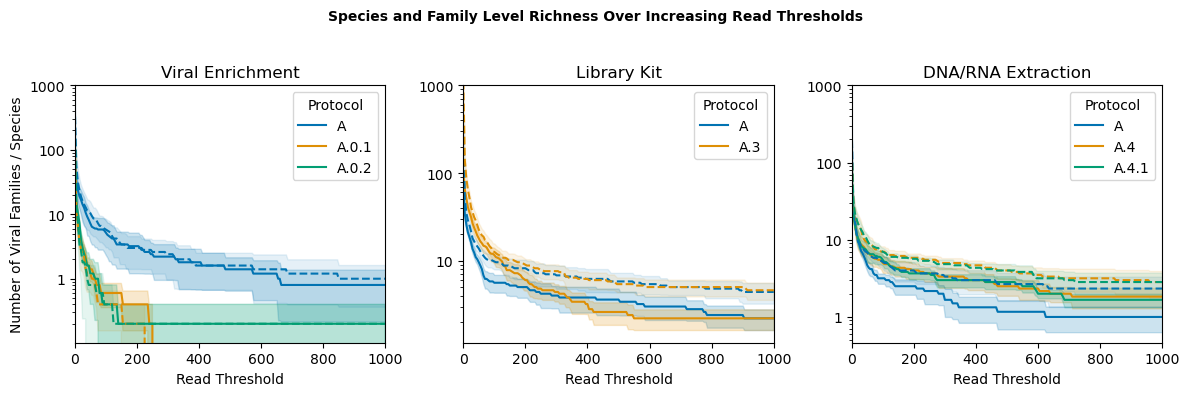

In [65]:
plot_viral_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 1001, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Richness Over Increasing Read Thresholds' )

A 1.0
A.0.1 6.687696750207195e-05
A.0.2 3.75202596928359e-05


A 1.0
A.3 9.992007221626409e-16
A 1.0
A.4 0.014563232653153735
A.4.1 0.00010087087793075877


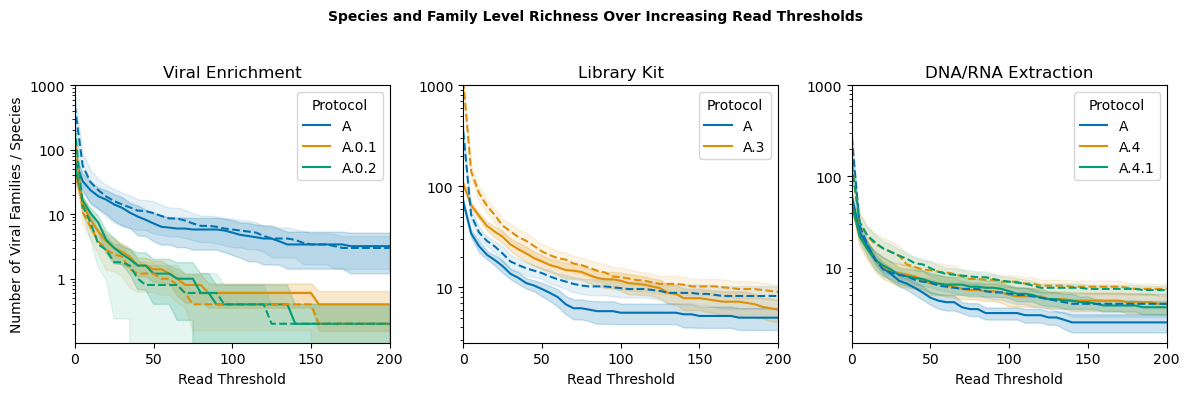

In [66]:
plot_viral_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 201, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Richness Over Increasing Read Thresholds' )

A 1.0
A.0.1 1.4587073549066076e-08
A.0.2 2.0921344656699148e-08
A 1.0
A.3 0.9999999999385829
A 1.0
A.4 0.9698171596352099
A.4.1 2.5690277295487007e-06


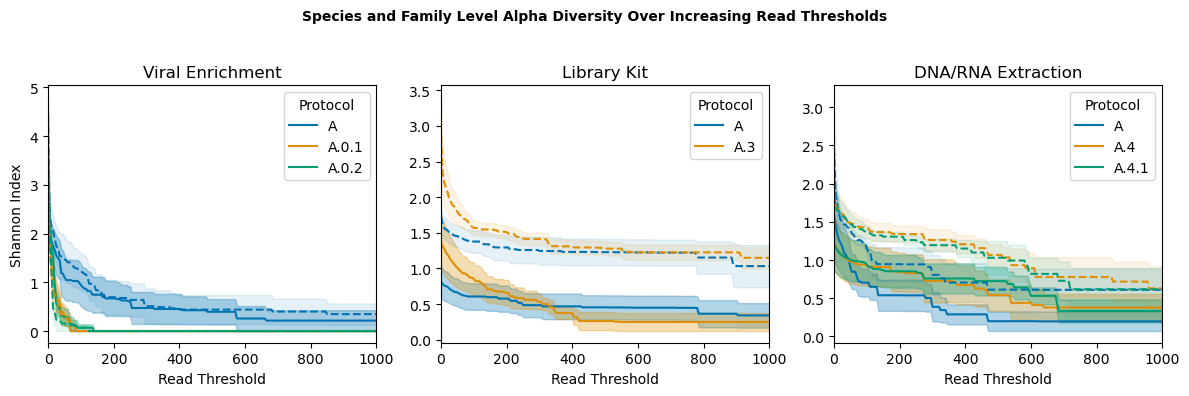

In [67]:
plot_richness_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 1001, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Alpha Diversity Over Increasing Read Thresholds', method='Shannon')

A 1.0
A.0.1 2.1007967587749476e-08
A.0.2 3.738260045960118e-08
A 1.0
A.3 0.9713654781484353
A 1.0
A.4 0.9950924710273662
A.4.1 0.9884289393201972


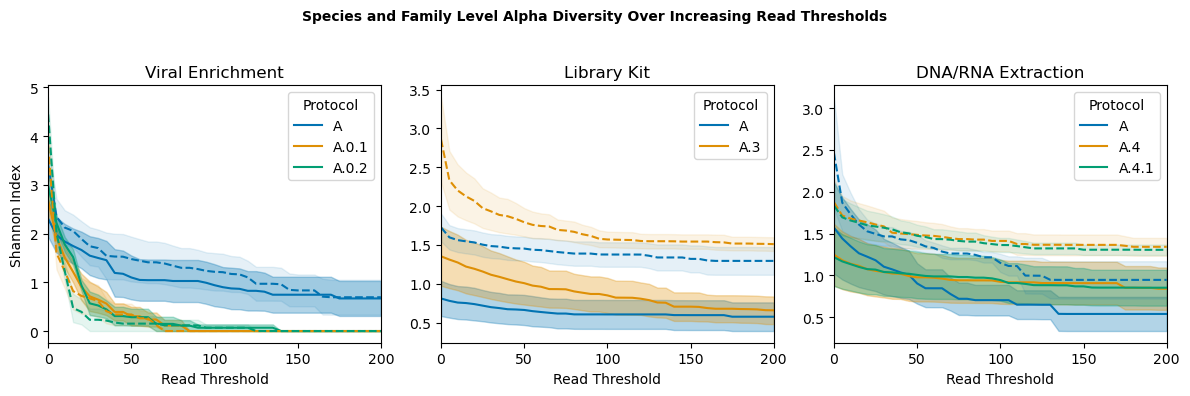

In [68]:
plot_richness_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 201, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Alpha Diversity Over Increasing Read Thresholds', method='Shannon')

A 1.0
A.0.1 8.82871553642417e-12
A.0.2 1.4843459794633418e-11
A 1.0
A.3 0.9999999999998199
A 1.0
A.4 0.9999837932328595
A.4.1 4.116031578460522e-05


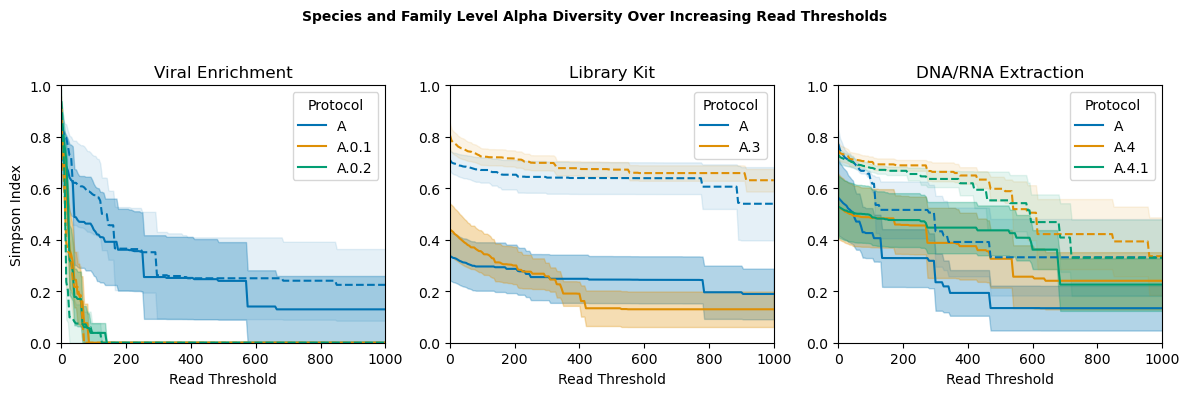

In [69]:
plot_richness_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 1001, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Alpha Diversity Over Increasing Read Thresholds', method='Simpson')

A 1.0
A.0.1 7.527373169224916e-10
A.0.2 1.6226964216770057e-09
A 1.0
A.3 0.9999999948014728
A 1.0
A.4 0.9999925645571808
A.4.1 0.9999392924503401


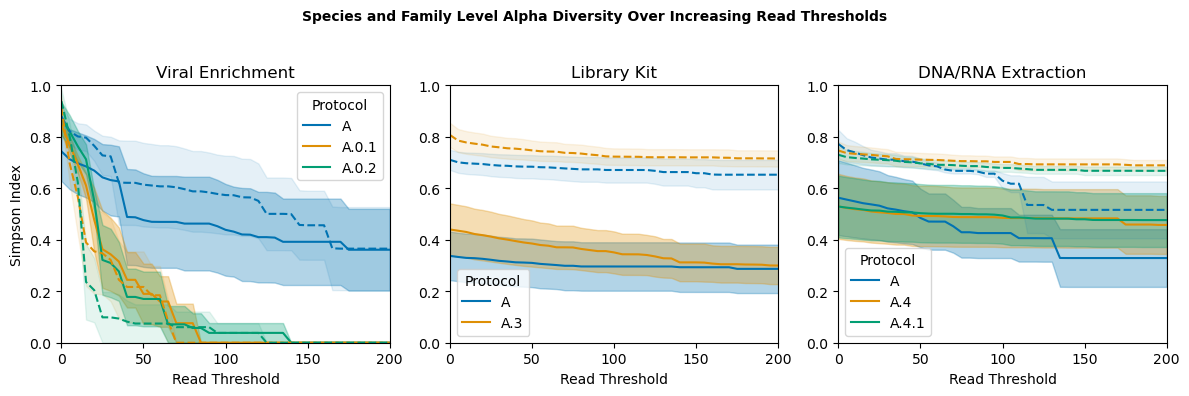

In [70]:
plot_richness_families_species_full([fam1_data, fam4_data, fam6_data], [sp1_data, sp4_data, sp6_data], range(0, 201, 5), ['Viral Enrichment', 'Library Kit', 'DNA/RNA Extraction'], 'Species and Family Level Alpha Diversity Over Increasing Read Thresholds', method='Simpson')

## Figure 5

For figure 5, we wanted to look at how the composition of different types of viruses (DNA vs RNA, SS vs DS) were affected

Note that code in the block below was changed to generate data with or without Microviridae

In [ ]:
ictv = pd.read_excel('../../src/util/VMR_MSL39_v1.xlsx', sheet_name='VMR MSL39 v1')
genome_comps = list(ictv.groupby(['Family', 'Genome composition']).count().index)
genome_comps = {family:genome_comp for family, genome_comp in genome_comps}

## the ones that were not in VMR
others = {'Myoviridae': 'dsDNA',
          'Podoviridae': 'dsDNA',
          'Totiviridae': 'dsRNA',
          'Luteoviridae': 'ssRNA(+)',
          'Herpesviridae': 'dsDNA',
          'Reoviridae': 'dsRNA',
          'Cruciviridae': 'ssDNA',
          'Siphoviridae': 'dsDNA'}
for fam in others.keys():
    genome_comps[fam] = others[fam]

def get_genome_comp(family):
    if family in genome_comps:
        return genome_comps[family]
    else:
        return ''

## THESE LINES WERE CHANGED FOR MICROVIRIDAE/NO MICROVIRIDAE
family_data = pd.read_csv('family_data.csv', index_col=0).drop('Microviridae')
# family_data = pd.read_csv('family_data.csv', index_col=0)

family_data = family_data.fillna(0)
family_data['Genome Composition'] = family_data.index.to_series().apply(get_genome_comp)

genome_comps_data = family_data.groupby('Genome Composition').sum()
genome_comps_data['Count'] = family_data.groupby('Genome Composition')['Genome Composition'].count()
genome_comps_data

,0168-1Q-virome_S7_L001.tsv,0168-1Z-virome_S6_L001.tsv,0168-U-virome_S13_L001.tsv,14-2820AC-VIROME_S5_L001.tsv,14-2820AC-viromeTruSeq.tsv,15-8466AC-VIROME_S6_L001.tsv,15-8466AC-viromeTruSeq.tsv,2088Q-28-06-viromeT_S7_L001.tsv,2088Q-29-06-viromeT_S11_L001.tsv,2088U-29-06-viromeT_S3_L001.tsv,...,SANK2-virome_S70_L001.tsv,SARS.VIROMA.S96.tsv,SBC1-virome.tsv,SBC2-virome.tsv,SBD1-virome.tsv,SBD2-virome.tsv,SBK-virome_S68_L001.tsv,SBNK-virome_S71_L001.tsv,target_human_sLC3_S32_L001.tsv,Count
Genome Composition,,,,,,,,,,,,,,,,,,,,,
dsDNA,126.0,77.0,795.0,395.0,2191.0,1514.0,1400.0,315.0,328.0,67.0,...,18.0,18.0,16.0,14.0,19.0,27.0,31.0,24.0,18.0,61
dsDNA-RT,2.0,2.0,10.0,16.0,49.0,64.0,13.0,0.0,3.0,2.0,...,2.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,2
dsRNA,9.0,1.0,2.0,72.0,96.0,31.0,23.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,6.0,0.0,1.0,1.0,11
ssDNA,0.0,0.0,23.0,5.0,38.0,0.0,20.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
ssDNA(+),0.0,0.0,2.0,4.0,21.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
ssDNA(+/-),8.0,3.0,67.0,64.0,494.0,14.0,139.0,1.0,1.0,17.0,...,0.0,0.0,1.0,3.0,2.0,1.0,0.0,4.0,0.0,8
ssDNA(-),7.0,0.0,11.0,3.0,50.0,2.0,23.0,2.0,1.0,3.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2
ssRNA(+),47.0,35.0,408.0,480.0,1103.0,340.0,561.0,11.0,9.0,14.0,...,313.0,494.0,310.0,237.0,606.0,851.0,192.0,270.0,8.0,48
ssRNA(+/-),0.0,1.0,2.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [72]:
genome_comps = genome_comps_data.T
genome_comps['filename'] = genome_comps.index.str[:-4]

gen1_data = get_comp1_data(genome_comps)
gen2_data = get_comp2_data(genome_comps)
gen3_data = get_comp3_data(genome_comps)
gen4_data = get_comp4_data(genome_comps)
gen6_data = get_comp6_data(genome_comps)

In [73]:
genome_comps_summed = genome_comps_data.copy()
genome_comps_summed['group'] = genome_comps_summed.index.str[:5]
genome_comps_summed = genome_comps_summed.groupby('group').sum().T
genome_comps_summed['filename'] = genome_comps_summed.index.str[:-4]

gen1_data_sum = get_comp1_data(genome_comps_summed)
gen2_data_sum = get_comp2_data(genome_comps_summed)
gen3_data_sum = get_comp3_data(genome_comps_summed)
gen4_data_sum = get_comp4_data(genome_comps_summed)
gen6_data_sum = get_comp6_data(genome_comps_summed)

In [74]:
def get_abundances(data):
    cols = ['filename', 'Group', 'Individual']
    data_abun = data.drop(columns=cols)
    data_abun = data_abun.div(data_abun.sum(axis=1), axis=0)*100
    data_abun[cols] = data[cols]
    return data_abun

In [75]:
gen1_data_abun = get_abundances(gen1_data)
gen2_data_abun = get_abundances(gen2_data)
gen3_data_abun = get_abundances(gen3_data)
gen4_data_abun = get_abundances(gen4_data)
gen6_data_abun = get_abundances(gen6_data)
gen1_data_sum_abun = get_abundances(gen1_data_sum)
gen2_data_sum_abun = get_abundances(gen2_data_sum)
gen3_data_sum_abun = get_abundances(gen3_data_sum)
gen4_data_sum_abun = get_abundances(gen4_data_sum)
gen6_data_sum_abun = get_abundances(gen6_data_sum)

This generates a plot that was not used in final manuscript:

In [ ]:
# boxplot_graph_full([gen1_data_sum_abun, gen2_data_sum_abun, gen3_data_sum_abun, gen4_data_sum_abun, gen6_data_sum_abun], 'Group', 'Individual', ['dsDNA','dsRNA', 'ssDNA', 'ssRNA'], ['dsDNA','dsRNA', 'ssDNA', 'ssRNA'], ['Viral\nEnrichment', 'Viral Enrichment\nStrategy', 'Amplification\nStrategy', 'Library Kit', 'DNA/RNA\nExtraction'], save_name)

In [76]:
def plot_genome_composition_all(dfs, group_names, overall_title, width=4, save_name=''):
    num_plots = len(dfs)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(width, 2 * num_plots), sharex=True)
    # dfs = list(reversed(dfs))
    # group_names = list(reversed(group_names))
    
    palette = sns.color_palette("Paired")  # You can choose any seaborn palette, e.g., "Blues", "viridis", etc.
    colors = ['gray'] + palette[1:]
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one subplot

    for i, (df, group_name) in enumerate(zip(dfs, group_names)):
        # Reshape the DataFrame to long format
        abundance_cols = df.columns.difference(['Group', 'Individual', 'filename', 'Genome Composition'])
        df[abundance_cols] = df[abundance_cols] / 100

        
        df_long = df.melt(id_vars=['Group', 'Individual', 'filename'], 
                          value_vars=df.columns.difference(['Genome Composition', 'Group', 'Individual', 'Filename']),
                          var_name='Genome Composition Type', 
                          value_name='Value').sort_values(by='Group')
        
        df_long = df_long.sort_values('Genome Composition Type')

        ax = axes[i]
        hue_order = sorted(df_long['Group'].unique())
        sns.boxplot(data=df_long, x='Genome Composition Type', y='Value', hue='Group', hue_order=hue_order, palette=colors, width=0.4, ax=ax)
        
        # ax.grid(True, linestyle='-', alpha=0.4)
        ax.set_xlabel('Genome Composition Type' if i == num_plots - 1 else '')
        ax.set_ylabel('Reads')
        ax.set_ylim(0, 1)

        ax.set_title(group_name)
        ax.legend(title='Protocol', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility
    
    plt.suptitle(overall_title, fontsize=10, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'final_figures/5_{save_name}.png', bbox_inches='tight', format='png', dpi=800)
    plt.show()


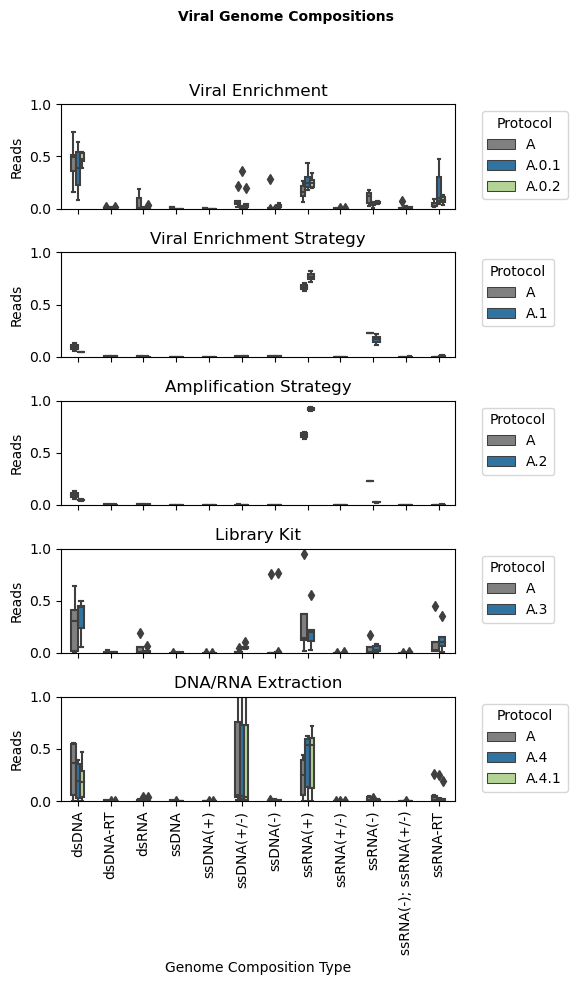

In [77]:
plot_genome_composition_all([gen1_data_abun, gen2_data_abun, gen3_data_abun, gen4_data_abun, gen6_data_abun], ['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'], 'Viral Genome Compositions', width=6, save_name='supp_micro')

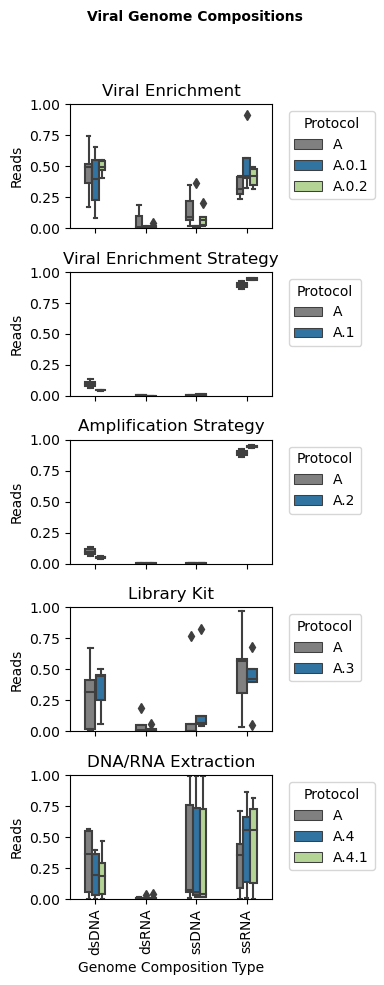

In [78]:
plot_genome_composition_all([gen1_data_sum_abun, gen2_data_sum_abun, gen3_data_sum_abun, gen4_data_sum_abun, gen6_data_sum_abun], ['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'], 'Viral Genome Compositions', save_name='b_micro')

In [79]:
def compositional_comp_plot_counts(data, starting_individual=0, individual_order=[], save_name=''):
    categories = ['dsDNA', 'dsRNA', 'ssDNA', 'ssRNA']
    samples = data['filename'].unique()
    individuals = data['Individual'].unique()
    if len(individual_order) > 0:
        if len(individual_order) == len(individuals):
            individuals = individual_order
    
    count_data = data.copy()
    count_data[categories] = count_data[categories]+1 ## add 1 for log plots
    
    comp_data = data.copy()  # Copy of original data to keep absolute counts
    # Normalize the counts to compositional data (proportions)
    comp_data[categories] = comp_data[categories].div(comp_data[categories].sum(axis=1), axis=0)
    
    # Create subplots (2 rows: 1 for compositional, 1 for absolute counts line plot)
    fig, axs = plt.subplots(2, len(individuals), figsize=(1.5 * len(individuals), 3), height_ratios=[3, 1], sharex=True)

    if len(individuals) == 1:
        axs = [axs]  # Ensure axs is iterable when there's only one subplot

    # Loop over individuals to plot both compositional and absolute counts
    for j, (ax, individual) in enumerate(zip(axs[0], individuals)):
        individual_df = comp_data[comp_data['Individual'] == individual]
        individual_df = individual_df.sort_values(by='Group')  # Sort by 'Group' column
        
        # Bar plot for compositional data (stacked bars)
        bar_width = 0.05
        bar_positions = np.arange(len(individual_df)) * 0.1

        # Bottom positions for each bar
        bottoms = np.zeros(len(individual_df))

        # Plot each category for compositional data (stacked bars)
        for i, category in enumerate(categories):
            values = individual_df[category].values
            bars = ax.bar(bar_positions, values, width=bar_width, label=category, bottom=bottoms)
            bottoms += values

        # Collect coordinates for shading
        bottom_coords = []
        top_coords = []
        colors = []

        for patch in ax.patches:
            x, y = patch.get_xy()
            w, h = patch.get_width(), patch.get_height()
            col = patch.get_facecolor()

            bottom_coords += [(x, y), (x + w, y)]
            top_coords += [(x, y + h), (x + w, y + h)]
            colors.append(col)

        # Convert to numpy for easy slicing
        bottom_coords = np.array(bottom_coords)
        top_coords = np.array(top_coords)
        colors = np.array(colors)

        # Extract the x coordinates
        x_coords = np.unique(bottom_coords[:, 0])
        num_x_coords = len(x_coords)

        # Fill between each bottom and top pairs for shading
        for i in range(0, len(bottom_coords), num_x_coords):
            col_i = int(i / num_x_coords * len(colors) / (len(categories)))
            ax.fill_between(x_coords, top_coords[i:i + num_x_coords, 1], bottom_coords[i:i + num_x_coords, 1], color=colors[col_i], alpha=0.2)

        # Add labels, title, and legend
        ax.set_ylabel('')
        ax.set_title(f'Individual {starting_individual+j}', size=10)
        ax.tick_params(axis='y', labelsize=7, pad=1)
        ax.set_ylim(0, 1)
        ax.set_xticks(bar_positions)
        if j == 0:
            ax.set_ylabel('Composition', size=8)

    for j, (ax, individual) in enumerate(zip(axs[1], individuals)):
        
        individual_df_counts = count_data[count_data['Individual'] == individual]
        individual_df_counts = individual_df_counts.sort_values(by='Group')
        
        # Plot the line plot for absolute counts (raw values)
        for category in categories:
            ax.plot(bar_positions, individual_df_counts[category], marker='o', label=category)

        # Add y-axis label for absolute counts plot
        ax.tick_params(axis='y', labelsize=7, pad=1)
        ax.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False, rotation=90, pad=14)
        ax.set_xticklabels(individual_df['Group'], rotation=90, size=8, ha='center', va='center')
        ax.set_yscale('log')
            # ax.yaxis.set_major_formatter(ticker.LogFormatter())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

        ax.grid(True)
        if j == 0:
            ax.set_ylabel('Reads', size=8)

    handles, labels = axs[1, -1].get_legend_handles_labels() 
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), title='Nucleic Acid')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25, right=0.85, hspace=0.45)  # Decrease space between subplots and adjust right space for legend
    plt.savefig(f'final_figures/5a_{save_name}', dpi=600, bbox_inches='tight')
    # Show the plot
    plt.show()

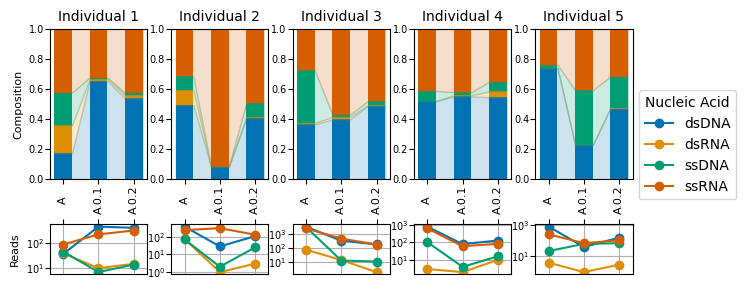

In [80]:
compositional_comp_plot_counts(gen1_data_sum, save_name='1', starting_individual=1, individual_order=['9092', '2820', '9324', '0168', '8466'])

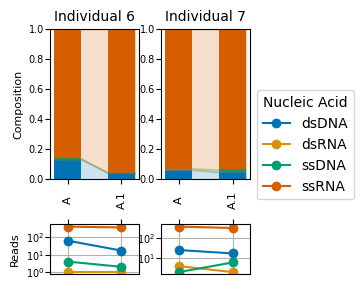

In [81]:
compositional_comp_plot_counts(gen2_data_sum, starting_individual=6, save_name='2', individual_order=['1', '2'])

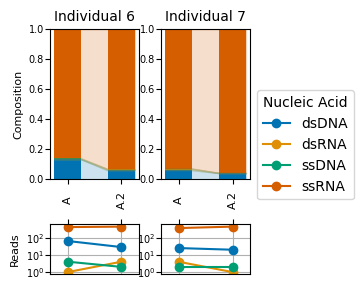

In [82]:
compositional_comp_plot_counts(gen3_data_sum, starting_individual=6, save_name='3', individual_order=['1', '2'])  

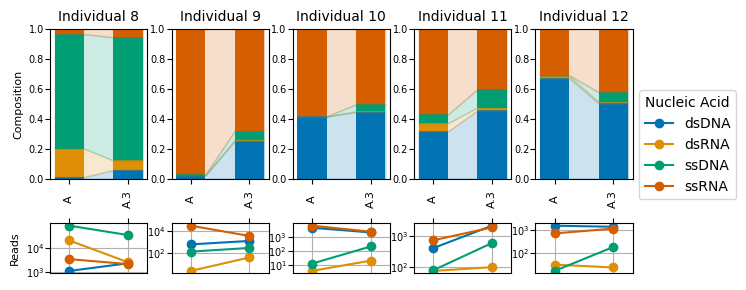

In [83]:
compositional_comp_plot_counts(gen4_data_sum, starting_individual=8, save_name='4', individual_order=['S1', 'S3', 'S4', '14', '15'])  


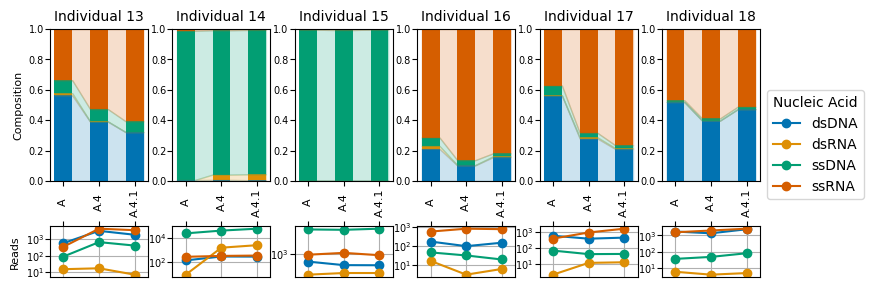

In [84]:
compositional_comp_plot_counts(gen6_data_sum, starting_individual=13, save_name='5', individual_order=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])  


In [85]:
gen1_data = get_comp1_data(genome_comps, True)
gen2_data = get_comp2_data(genome_comps, True)
gen3_data = get_comp3_data(genome_comps, True)
gen4_data = get_comp4_data(genome_comps, True)
gen6_data = get_comp6_data(genome_comps, True)

gen1_data_sum = get_comp1_data(genome_comps_summed, True)
gen2_data_sum = get_comp2_data(genome_comps_summed, True)
gen3_data_sum = get_comp3_data(genome_comps_summed, True)
gen4_data_sum = get_comp4_data(genome_comps_summed, True)
gen6_data_sum = get_comp6_data(genome_comps_summed, True)

gen1_data_abun = get_abundances(gen1_data)
gen2_data_abun = get_abundances(gen2_data)
gen3_data_abun = get_abundances(gen3_data)
gen4_data_abun = get_abundances(gen4_data)
gen6_data_abun = get_abundances(gen6_data)
gen1_data_sum_abun = get_abundances(gen1_data_sum)
gen2_data_sum_abun = get_abundances(gen2_data_sum)
gen3_data_sum_abun = get_abundances(gen3_data_sum)
gen4_data_sum_abun = get_abundances(gen4_data_sum)
gen6_data_sum_abun = get_abundances(gen6_data_sum)

A.4.1 (Purelink + cDNA synthesis) dsDNA 0.30952380952380953
A.4.1 (Purelink + cDNA synthesis) ssDNA 0.8181818181818182
A.4.1 (Purelink + cDNA synthesis) ssRNA 0.48484848484848486
A.4 (PureLink Viral RNA/DNA mini kit) dsDNA 0.48484848484848486
A.4 (PureLink Viral RNA/DNA mini kit) ssDNA 0.6991341991341992
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA 0.48484848484848486
A.3 (TruSeq Nano DNA Library Prep) dsDNA 0.5476190476190477
A.3 (TruSeq Nano DNA Library Prep) ssDNA 0.15079365079365079
A.3 (TruSeq Nano DNA Library Prep) ssRNA 0.8412698412698413
A.2 (MDA Amplification) dsDNA 0.3333333333333333
A.2 (MDA Amplification) ssDNA 0.3333333333333333
A.2 (MDA Amplification) ssRNA 0.3333333333333333
A.1 (PEG-6000) dsDNA 0.3333333333333333
A.1 (PEG-6000) ssDNA 0.6666666666666666
A.1 (PEG-6000) ssRNA 0.3333333333333333
A.0.2 (All Prep Power Viral DNA/RNA kit) dsDNA 0.8412698412698413
A.0.2 (All Prep Power Viral DNA/RNA kit) ssDNA 0.30952380952380953
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA 0.

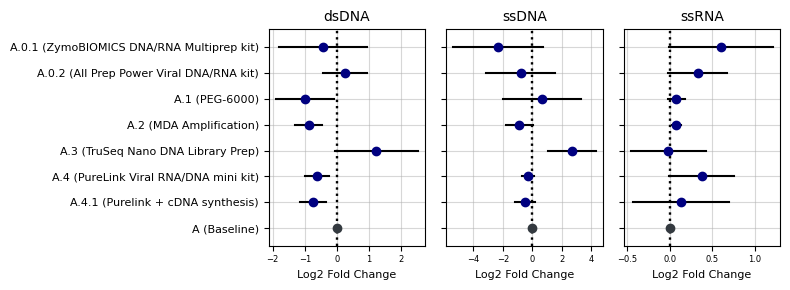

In [86]:
multiple_fold_changes(list(reversed([gen1_data_sum_abun, gen2_data_sum_abun, gen3_data_sum_abun, gen4_data_sum_abun, gen6_data_sum_abun])), ['A (Baseline)']*5,  list(reversed(['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'])), ['dsDNA', 'ssDNA', 'ssRNA'], ['dsDNA', 'ssDNA', 'ssRNA'], p_val=0.05, plot_controls=False, save_name='6_supp_log_micro_abun')

A.4.1 (Purelink + cDNA synthesis) ssRNA(+) 0.3939393939393939
A.4.1 (Purelink + cDNA synthesis) ssRNA(-) 0.48484848484848486
A.4.1 (Purelink + cDNA synthesis) ssRNA-RT 0.3939393939393939
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA(+) 0.24025974025974026
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA(-) 0.5887445887445888
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA-RT 0.6991341991341992
A.3 (TruSeq Nano DNA Library Prep) ssRNA(+) 1.0
A.3 (TruSeq Nano DNA Library Prep) ssRNA(-) 0.5476190476190477
A.3 (TruSeq Nano DNA Library Prep) ssRNA-RT 0.8412698412698413
A.2 (MDA Amplification) ssRNA(+) 0.3333333333333333
A.2 (MDA Amplification) ssRNA(-) 0.3333333333333333
A.2 (MDA Amplification) ssRNA-RT 1.0
A.1 (PEG-6000) ssRNA(+) 0.3333333333333333
A.1 (PEG-6000) ssRNA(-) 0.3333333333333333
A.1 (PEG-6000) ssRNA-RT 0.3333333333333333
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA(+) 0.15079365079365079
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA(-) 0.5476190476190477
A.0.2 (All Prep Power Viral DNA

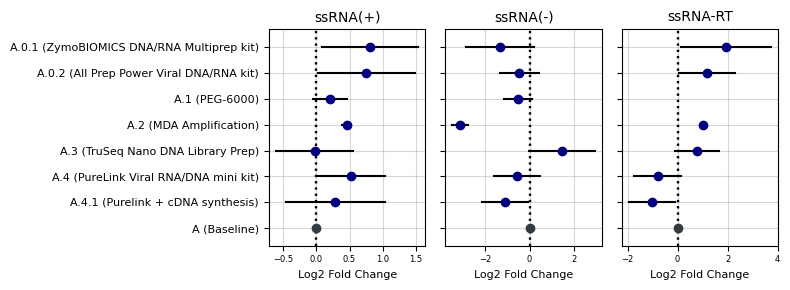

In [87]:
multiple_fold_changes(list(reversed([gen1_data_abun, gen2_data_abun, gen3_data_abun, gen4_data_abun, gen6_data_abun])), ['A (Baseline)']*5,  list(reversed(['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'])), ['ssRNA(+)', 'ssRNA(-)', 'ssRNA-RT'], ['ssRNA(+)', 'ssRNA(-)', 'ssRNA-RT'], p_val=0.05, plot_controls=False, save_name='6_supp_log2_micro_abun')

A.4.1 (Purelink + cDNA synthesis) dsDNA 0.9372294372294373
A.4.1 (Purelink + cDNA synthesis) ssDNA 0.9372294372294373
A.4.1 (Purelink + cDNA synthesis) ssRNA 0.24025974025974026
A.4 (PureLink Viral RNA/DNA mini kit) dsDNA 0.9372294372294373
A.4 (PureLink Viral RNA/DNA mini kit) ssDNA 0.9372294372294373
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA 0.13203463203463203
A.3 (TruSeq Nano DNA Library Prep) dsDNA 0.30952380952380953
A.3 (TruSeq Nano DNA Library Prep) ssDNA 0.15079365079365079
A.3 (TruSeq Nano DNA Library Prep) ssRNA 0.6904761904761905
A.2 (MDA Amplification) dsDNA 0.6666666666666666
A.2 (MDA Amplification) ssDNA 0.6170750774519738
A.2 (MDA Amplification) ssRNA 0.3333333333333333
A.1 (PEG-6000) dsDNA 0.22067136191984682
A.1 (PEG-6000) ssDNA 1.0
A.1 (PEG-6000) ssRNA 0.3333333333333333
A.0.2 (All Prep Power Viral DNA/RNA kit) dsDNA 0.2222222222222222
A.0.2 (All Prep Power Viral DNA/RNA kit) ssDNA 0.07491289930444599
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA 0.222222222222222

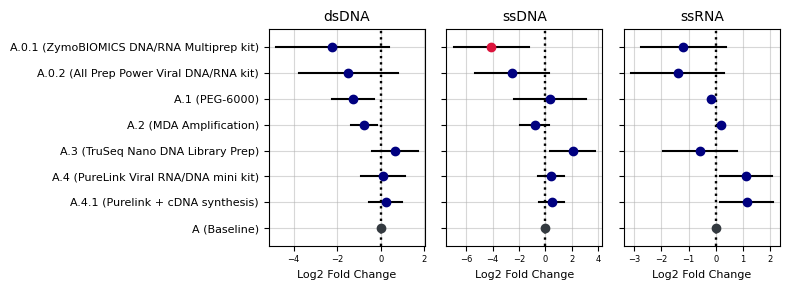

In [88]:
multiple_fold_changes(list(reversed([gen1_data_sum, gen2_data_sum, gen3_data_sum, gen4_data_sum, gen6_data_sum])), ['A (Baseline)']*5,  list(reversed(['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'])), ['dsDNA', 'ssDNA', 'ssRNA'], ['dsDNA', 'ssDNA', 'ssRNA'], p_val=0.05, plot_controls=False, save_name='6_supp_log_micro')

A.4.1 (Purelink + cDNA synthesis) ssRNA(+) 0.24025974025974026
A.4.1 (Purelink + cDNA synthesis) ssRNA(-) 0.8725590308923818
A.4.1 (Purelink + cDNA synthesis) ssRNA-RT 0.8181818181818182
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA(+) 0.17965367965367965
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA(-) 0.8725590308923818
A.4 (PureLink Viral RNA/DNA mini kit) ssRNA-RT 0.9360746770666198
A.3 (TruSeq Nano DNA Library Prep) ssRNA(+) 1.0
A.3 (TruSeq Nano DNA Library Prep) ssRNA(-) 0.30952380952380953
A.3 (TruSeq Nano DNA Library Prep) ssRNA-RT 1.0
A.2 (MDA Amplification) ssRNA(+) 0.3333333333333333
A.2 (MDA Amplification) ssRNA(-) 0.3333333333333333
A.2 (MDA Amplification) ssRNA-RT 1.0
A.1 (PEG-6000) ssRNA(+) 1.0
A.1 (PEG-6000) ssRNA(-) 0.3333333333333333
A.1 (PEG-6000) ssRNA-RT 0.4142161782425252
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA(+) 0.30952380952380953
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA(-) 0.03614514204656228
A.0.2 (All Prep Power Viral DNA/RNA kit) ssRNA-RT 0.6904761

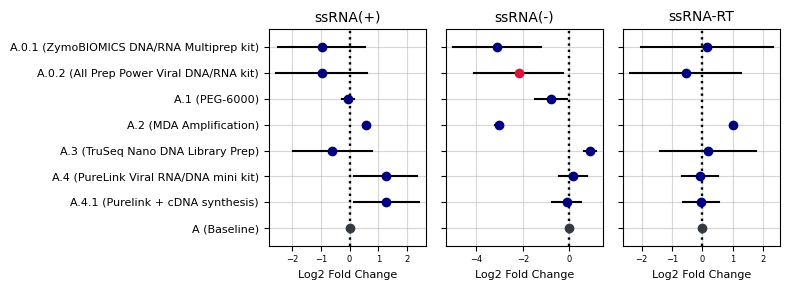

In [89]:
multiple_fold_changes(list(reversed([gen1_data, gen2_data, gen3_data, gen4_data, gen6_data])), ['A (Baseline)']*5,  list(reversed(['Viral Enrichment', 'Viral Enrichment Strategy', 'Amplification Strategy', 'Library Kit', 'DNA/RNA Extraction'])), ['ssRNA(+)', 'ssRNA(-)', 'ssRNA-RT'], ['ssRNA(+)', 'ssRNA(-)', 'ssRNA-RT'], p_val=0.05, plot_controls=False, save_name='6_supp_log2_micro')

## Figure 6

For figure 6, we primarily focus on showing the best protocol's difference from the baseline in terms of the composition. We do this by doing a heatmap of the families in the baseline vs 

In [91]:
family = pd.read_csv('family_data.csv')
genus = pd.read_csv('genus_data.csv')
species = pd.read_csv('species_data.csv')

## just changing the titles to match the metadata
family.columns = [col.replace('.tsv', '') for col in family.columns]
genus.columns = [col.replace('.tsv', '') for col in genus.columns]
species.columns = [col.replace('.tsv', '') for col in species.columns]

## rename first column to be 'tax'
family.rename(columns={ family.columns[0]: "tax" }, inplace = True)
genus.rename(columns={ genus.columns[0]: "tax" }, inplace = True)
species.rename(columns={ species.columns[0]: "tax" }, inplace = True)

family

,tax,0168-1Q-virome_S7_L001,0168-1Z-virome_S6_L001,0168-U-virome_S13_L001,14-2820AC-VIROME_S5_L001,14-2820AC-viromeTruSeq,15-8466AC-VIROME_S6_L001,15-8466AC-viromeTruSeq,2088Q-28-06-viromeT_S7_L001,2088Q-29-06-viromeT_S11_L001,...,SANK1-virome_S69_L001,SANK2-virome_S70_L001,SARS.VIROMA.S96,SBC1-virome,SBC2-virome,SBD1-virome,SBD2-virome,SBK-virome_S68_L001,SBNK-virome_S71_L001,target_human_sLC3_S32_L001
0,Artoviridae,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ampullaviridae,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aspiviridae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malacoherpesviridae,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chuviridae,NaN,NaN,NaN,1.0,7.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Hantaviridae,NaN,NaN,2.0,3.0,126.0,6.0,27.0,20.0,19.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Siphoviridae,38.0,21.0,50.0,55.0,404.0,233.0,210.0,NaN,NaN,...,1.0,2.0,NaN,NaN,2.0,2.0,1.0,2.0,2.0,NaN
159,Geminiviridae,7.0,1.0,9.0,6.0,40.0,8.0,15.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN
160,Roniviridae,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
from scipy.stats import gmean

def clr_transform(data):
    viral_tax = data['tax']
    counts = data.drop(columns=['tax'])

    # Apply clr transformation
    counts = counts.fillna(0) ## fill all na with 0
    counts = counts + 1 ## add one to each entry to avoid divide by 0
    counts = counts.div(counts.sum(axis=0), axis=1) ##transform to compositional data
    
    def clr(column):
        gm = gmean(column)  # Calculate geometric mean
        return np.log(column / gm)  # Perform CLR transformation

    clr_transformed = counts.apply(clr, axis=0)  # perform clr

    # Convert back to DataFrame
    clr_df = pd.DataFrame(clr_transformed, columns=counts.columns)
    clr_df.insert(0, 'tax', viral_tax)
    clr_df = clr_df.set_index('tax')
    
    return clr_df

In [93]:
clr_family = clr_transform(family).T
clr_family = clr_family.reset_index().rename(columns={'index':'filename'})
clr_family_comp1 = get_comp1_data(clr_family)
clr_family_comp4 = get_comp4_data(clr_family)
clr_family_comp6 = get_comp6_data(clr_family)


In [96]:
def plot_families_boxplot(clr_data, top_n=25, save_name=''):
    
    family_medians = clr_data.drop(columns=['Group', 'Individual', 'filename']).median().sort_values(ascending=False)

    
    top_n_families = family_medians.head(top_n).index.tolist()

    # Filter the original DataFrame to include only the top n families
    filtered_df = clr_data[['Group', 'Individual', 'filename'] + top_n_families]

    melted_df = filtered_df.melt(id_vars=['Group', 'Individual', 'filename'], var_name='Family', value_name='Value')

    palette = sns.color_palette("Paired")  # You can choose any seaborn palette, e.g., "Blues", "viridis", etc.
    colors = ['gray'] + palette[1:]
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Family', y='Value', hue='Group', data=melted_df, 
                palette=colors, hue_order=sorted(melted_df['Group'].unique()),
                width=0.5)

    plt.grid(linestyle='--', alpha=0.4, axis='y')
    plt.title('Most Frequent Families')
    plt.xlabel('Viral Family')
    plt.ylabel('CLR Transformed Abundances')
    plt.legend(title='Protocol')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'final_figures/6_{save_name}.png', dpi=800, format='png', bbox_inches='tight')
    plt.show()

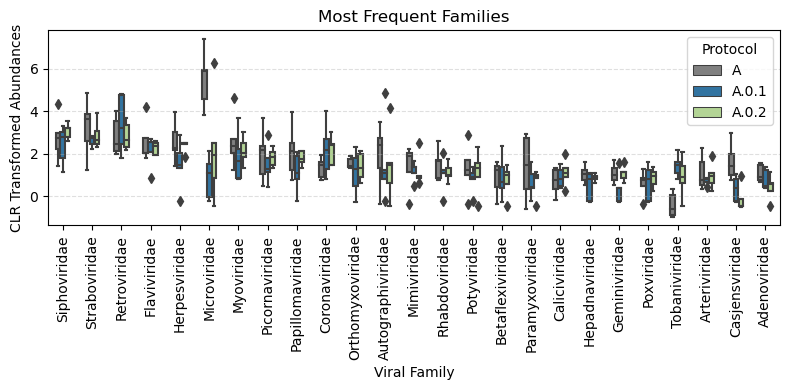

In [97]:
plot_families_boxplot(clr_family_comp1, 25, save_name='supp1')

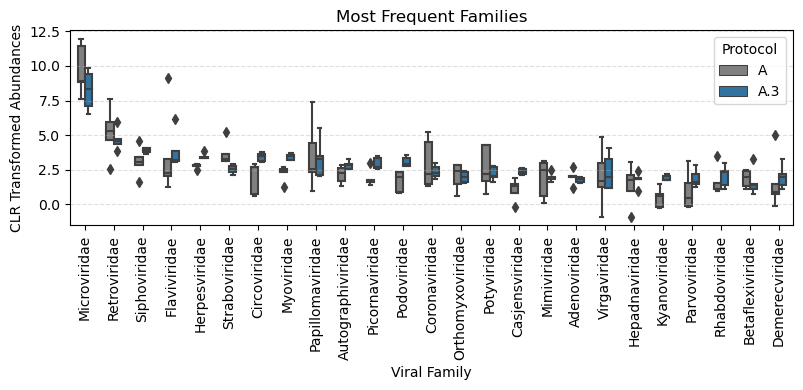

In [98]:
plot_families_boxplot(clr_family_comp4, 25, save_name='supp2')

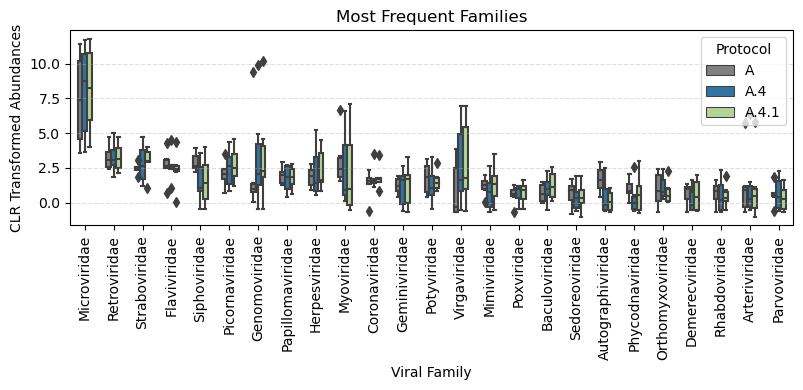

In [99]:
plot_families_boxplot(clr_family_comp6, 25, save_name='a')

### Other unused-figures

The following investigation was not used

In [ ]:
from matplotlib.patches import Circle
import matplotlib as mpl

def correlation_matrix_plot(data, groups=['A', 'A.4.1'], median_threshold=10):
    viral_counts = data[data['Group'].isin(groups)].fillna(0)

    virus_cols = [col for col in data.columns if col not in ['Group', 'Individual', 'filename'] and viral_counts[col].median() >= median_threshold and viral_counts[col].nlargest(2).min() != 0]
    df_filtered = viral_counts[['Group', 'Individual'] + virus_cols]

    corrs = np.full((len(virus_cols), len(virus_cols)), np.nan)

    for i, virus_a in enumerate(virus_cols):
        for j, virus_b in enumerate(virus_cols):
            group1 = df_filtered[df_filtered['Group'] == 'A'][['Group', 'Individual', virus_a]]
            group2 = df_filtered[df_filtered['Group'] == 'A.4.1'][['Group', 'Individual', virus_b]]
            # Filter dataframe to keep only relevant viruses
            df_1 = group1.pivot(index='Individual', columns='Group', values=[virus_a])
            df_2 = group2.pivot(index='Individual', columns='Group', values=[virus_b])
            
            correlation = df_1.merge(df_2, on='Individual').corr(method='spearman').iloc[0, 1]
            corrs[i, j] = correlation
            
    plt.figure(figsize=(6, 4))

    cmap = plt.cm.coolwarm
    norm = mpl.colors.Normalize(vmin=-1, vmax=1) 

    # Loop through each matrix entry and plot a circle
    for i in range(corrs.shape[0]):
        for j in range(corrs.shape[1]):
            # Get correlation value
            corr_val = corrs[i, j]
            
            # Set the size of the circle based on the correlation (scaled to a reasonable range)
            size = abs(corr_val) * 300  # Scale size (change this value for larger/smaller circles)
            
            # Plot a circle: (x, y), size (area), color (based on correlation)
            plt.scatter(j, i, s=size, color=plt.cm.coolwarm((corr_val + 1) / 2), 
                        alpha=0.8, edgecolors="w", linewidth=0.5)

    # Add title and labels
    plt.title("Correlation of Viral Families\n Between Protocols")
    plt.xticks(np.arange(len(virus_cols)), virus_cols, rotation=90)
    plt.yticks(np.arange(len(virus_cols)), virus_cols)
    plt.xlabel('A.4.1 (Purelink + cDNA)')
    plt.ylabel('A (Baseline)')

    # Set aspect ratio to equal for circles to appear round
    plt.gca().set_aspect('equal', adjustable='box')

    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
    cbar.set_label("Correlation", rotation=270, labelpad=15)

    # Show plot
    plt.savefig('final_figures/6b.png', dpi=600, bbox_inches='tight')
    plt.show()

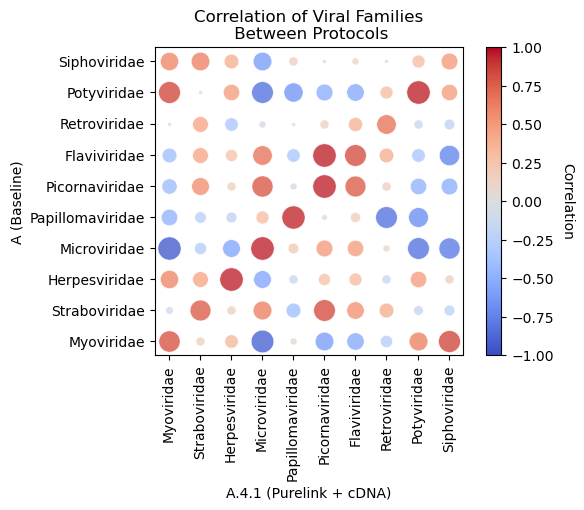

In [ ]:
comp6_viral_counts = get_comp6_data(family.set_index('tax').T.reset_index().rename(columns={'index':'filename'}))
correlation_matrix_plot(comp6_viral_counts)

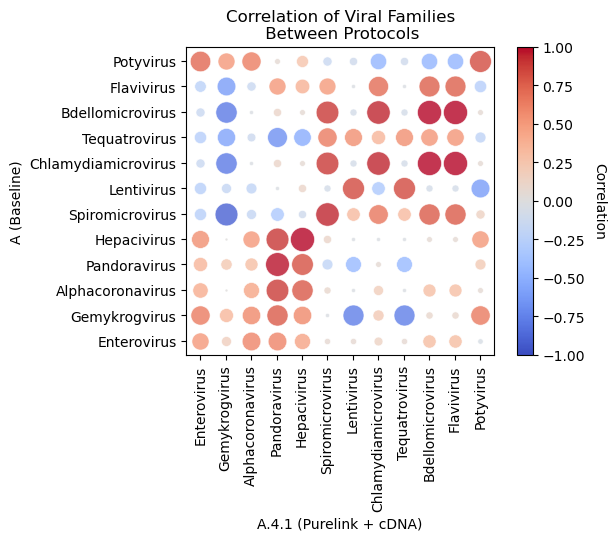

In [ ]:
comp6_viral_counts_genus = get_comp6_data(genus.set_index('tax').T.reset_index().rename(columns={'index':'filename'}))
correlation_matrix_plot(comp6_viral_counts_genus, median_threshold=3)

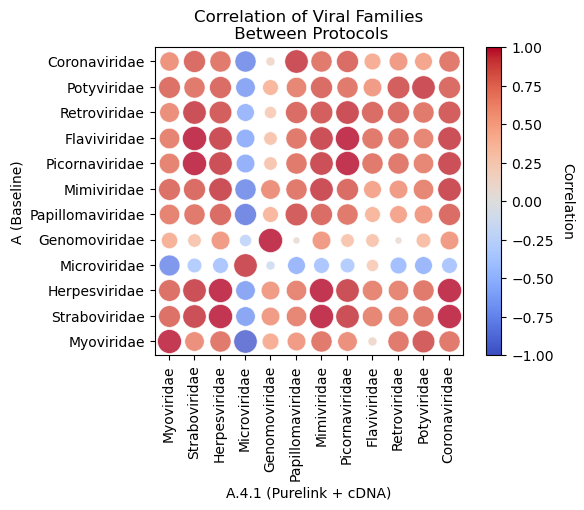

In [ ]:
comp6_viral_counts = get_comp6_data(family.set_index('tax').T.reset_index().rename(columns={'index':'filename'}))
comp6_viral_counts
comp6_data = comp6_viral_counts.drop(columns=['filename', 'Group', 'Individual'])
comp6_data = comp6_data.fillna(0).div(comp6_data.sum(axis=1), axis=0)
comp6_data[['filename', 'Group', 'Individual']] = comp6_viral_counts[['filename', 'Group', 'Individual']]
comp6_data
correlation_matrix_plot(comp6_data, median_threshold=0.0005)

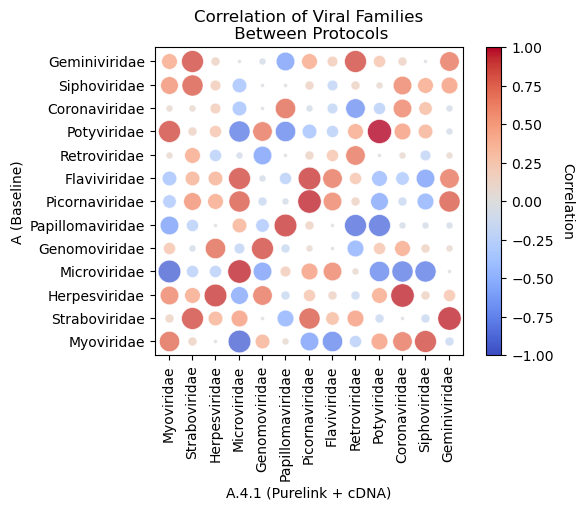

In [ ]:
correlation_matrix_plot(clr_family_comp6, median_threshold=1.5)

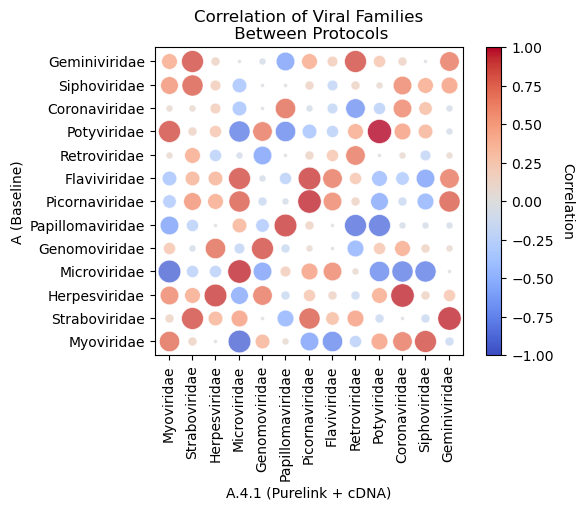

In [ ]:
correlation_matrix_plot(clr_family_comp6, median_threshold=1.5)